In [ ]:
from google.colab import files
files.upload()

KeyboardInterrupt: 

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


# **Installed Kaggle**

In [ ]:
!pip install kaggle


In [ ]:
!kaggle competitions download -c mtl-782-assignment-2-track-2-emotion-detection


# **Unzipped the Downloaded Files**

In [ ]:
!unzip mtl-782-assignment-2-track-2-emotion-detection.zip -d ./data


In [ ]:
import os
import glob
train_dir='/content/data/data/'
audio_files=glob.glob(os.path.join(train_dir,'**/*.wav'),recursive=True)
print(f"Total audio files found: {len(audio_files)}")
print("First 10 files:")
for file in audio_files[:10]:
    print(file)


Total audio files found: 9054
First 10 files:
/content/data/data/data/424_FEA.wav
/content/data/data/data/1482_NEU.wav
/content/data/data/data/1152_SAD.wav
/content/data/data/data/1484_DIS.wav
/content/data/data/data/938_NEU.wav
/content/data/data/data/897_NEU.wav
/content/data/data/data/753_HAP.wav
/content/data/data/data/79_SAD.wav
/content/data/data/data/892_HAP.wav
/content/data/data/data/1484_SAD.wav


# ***Extracting the Labels***

In [ ]:
import pandas as pd
labels=[os.path.basename(file).split('_')[-1].split('.')[0] for file in audio_files]
df=pd.DataFrame({'file':audio_files,'label':labels})
df.head()

,file,label
0,/content/data/data/data/424_FEA.wav,FEA
1,/content/data/data/data/1482_NEU.wav,NEU
2,/content/data/data/data/1152_SAD.wav,SAD
3,/content/data/data/data/1484_DIS.wav,DIS
4,/content/data/data/data/938_NEU.wav,NEU


# **Class Count**

In [ ]:
# Show distribution of labels
label_counts = df['label'].value_counts()
print("\nLabel Distribution:")
print(label_counts)


Label Distribution:
label
SAD    1556
ANG    1546
DIS    1532
HAP    1530
FEA    1518
NEU    1372
Name: count, dtype: int64


# **Basic Audio Properties**

**Audio and SR**

In [ ]:
import librosa
audio_props=[]
for file in audio_files[:]:
  try:
    signal,sr=librosa.load(file,sr=None)
    duration=librosa.get_duration(y=signal,sr=sr)
    audio_props.append({
        'file':file,
        'duration':duration,
        'sr':sr})
  except Exception as e:
    print(f"Error processing {file}: {e}")
df_props=pd.DataFrame(audio_props)
df_props.head()

,file,duration,sr
0,/content/data/data/data/424_FEA.wav,2.669313,16000
1,/content/data/data/data/1482_NEU.wav,1.975752,24414
2,/content/data/data/data/1152_SAD.wav,3.370000,16000
3,/content/data/data/data/1484_DIS.wav,2.881769,44100
4,/content/data/data/data/938_NEU.wav,2.569250,16000


**Missing Values**

In [ ]:
df_props['label']=df['label']
df=df_props
df.head()

,file,duration,sr,label
0,/content/data/data/data/424_FEA.wav,2.669313,16000,FEA
1,/content/data/data/data/1482_NEU.wav,1.975752,24414,NEU
2,/content/data/data/data/1152_SAD.wav,3.370000,16000,SAD
3,/content/data/data/data/1484_DIS.wav,2.881769,44100,DIS
4,/content/data/data/data/938_NEU.wav,2.569250,16000,NEU


In [ ]:
df.isnull().sum()

,0
file,0
duration,0
sr,0
label,0


**Handle Duplicate Entries**

In [ ]:
df=df_props.drop_duplicates(subset=['file'])

# **Standardize the sampling rates**

In [ ]:
df['sr'].value_counts()

,count
sr,
16000,5948
24414,1906
48000,862
44100,338


In [ ]:



import soundfile as sf

target_sr=16000
def resample_audio(file_path,target_sr):
  audio,sr=librosa.load(file_path,sr=None)
  if sr!=target_sr:
    audio_resam=librosa.resample(audio,orig_sr=sr,target_sr=target_sr)
  else:
    audio_resam=audio
  return audio_resam

df['audio_resam']=df['file'].apply(lambda fp:resample_audio(fp,target_sr))
df['sr']=target_sr
df.head()

,file,duration,sr,label,audio_resam
0,/content/data/data/data/424_FEA.wav,2.669313,16000,FEA,"[-0.0032348633, -0.0034484863, -0.003753662, -..."
1,/content/data/data/data/1482_NEU.wav,1.975752,16000,NEU,"[-1.6551698e-05, -8.5981155e-05, -3.673474e-05..."
2,/content/data/data/data/1152_SAD.wav,3.370000,16000,SAD,"[0.000579834, 0.0007019043, 0.00045776367, 0.0..."
3,/content/data/data/data/1484_DIS.wav,2.881769,16000,DIS,"[0.027035836, 0.045025602, 0.03884691, 0.04173..."
4,/content/data/data/data/938_NEU.wav,2.569250,16000,NEU,"[-0.0021972656, -0.0019226074, -0.0026550293, ..."


# **Dataset Overview**

In [ ]:
print(df.describe())


          duration       sr
count  9054.000000   9054.0
mean      2.602786  16000.0
std       0.700653      0.0
min       1.254076  16000.0
25%       2.104653  16000.0
50%       2.469125  16000.0
75%       2.936250  16000.0
max       7.024830  16000.0


**Plot histogram of durations to see distribution:**

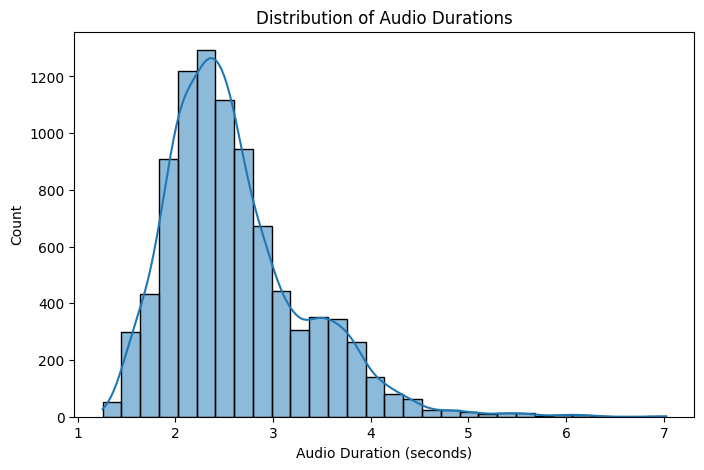

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['duration'], bins=30, kde=True)
plt.xlabel('Audio Duration (seconds)')
plt.ylabel('Count')
plt.title('Distribution of Audio Durations')
plt.show()

In [ ]:
df.head()

,file,duration,sr,label,audio_resam
0,/content/data/data/data/424_FEA.wav,2.669313,16000,FEA,"[-0.0032348633, -0.0034484863, -0.003753662, -..."
1,/content/data/data/data/1482_NEU.wav,1.975752,16000,NEU,"[-1.6551698e-05, -8.5981155e-05, -3.673474e-05..."
2,/content/data/data/data/1152_SAD.wav,3.370000,16000,SAD,"[0.000579834, 0.0007019043, 0.00045776367, 0.0..."
3,/content/data/data/data/1484_DIS.wav,2.881769,16000,DIS,"[0.027035836, 0.045025602, 0.03884691, 0.04173..."
4,/content/data/data/data/938_NEU.wav,2.569250,16000,NEU,"[-0.0021972656, -0.0019226074, -0.0026550293, ..."


## **Making Duration constant across all audio files **

In [ ]:
import numpy as np

def fix_audio_length(audio, sr, fixed_dur):
    num_samples = int(fixed_dur * sr)
    curr_len = len(audio)
    if curr_len < num_samples:
        pad_length = num_samples - curr_len
        audio = np.pad(audio, (0, pad_length), 'constant')
    elif curr_len > num_samples:
        audio = audio[:num_samples]
    return audio

# Apply directly to audio_resamp column
target_sr = 16000
fixed_dur = 2.5

df['audio_fixed'] = df['audio_resam'].apply(lambda audio: fix_audio_length(audio, target_sr, fixed_dur))


In [ ]:
df.head()

,file,duration,sr,label,audio_resam,audio_fixed
0,/content/data/data/data/424_FEA.wav,2.669313,16000,FEA,"[-0.0032348633, -0.0034484863, -0.003753662, -...","[-0.0032348633, -0.0034484863, -0.003753662, -..."
1,/content/data/data/data/1482_NEU.wav,1.975752,16000,NEU,"[-1.6551698e-05, -8.5981155e-05, -3.673474e-05...","[-1.6551698e-05, -8.5981155e-05, -3.673474e-05..."
2,/content/data/data/data/1152_SAD.wav,3.370000,16000,SAD,"[0.000579834, 0.0007019043, 0.00045776367, 0.0...","[0.000579834, 0.0007019043, 0.00045776367, 0.0..."
3,/content/data/data/data/1484_DIS.wav,2.881769,16000,DIS,"[0.027035836, 0.045025602, 0.03884691, 0.04173...","[0.027035836, 0.045025602, 0.03884691, 0.04173..."
4,/content/data/data/data/938_NEU.wav,2.569250,16000,NEU,"[-0.0021972656, -0.0019226074, -0.0026550293, ...","[-0.0021972656, -0.0019226074, -0.0026550293, ..."


In [ ]:

df['duration'] = 2.5




**Duration vs. Emotion Class**

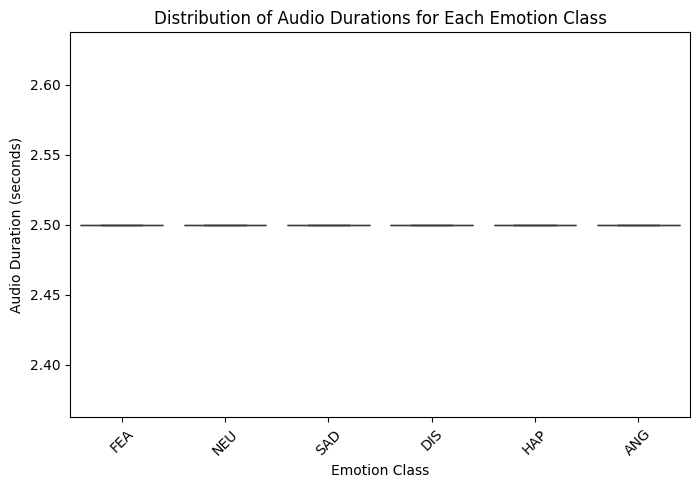

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['label'], y=df['duration'])
plt.xlabel('Emotion Class')
plt.ylabel('Audio Duration (seconds)')
plt.title('Distribution of Audio Durations for Each Emotion Class')
plt.xticks(rotation=45)
plt.show()


In [ ]:
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['duration'] < lower_bound) | (df['duration'] > upper_bound)]
print(f"Number of Outliers: {len(outliers)}")


Number of Outliers: 0


# **Feature Extraction**

**Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
def split_dataset(df,test_size=0.2,random_state=42):
  df_train,df_test=train_test_split(df,test_size=test_size,random_state=random_state)
  return df_train,df_test

# **Function For Features**

In [ ]:
def extract_features(audio, sr=16000, n_mfcc=13):
    try:
        # Compute MFCCs and summary statistics
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
        mfcc_mean = np.mean(mfccs, axis=1)
        mfcc_var = np.var(mfccs, axis=1)
        mfcc_delta1 = np.mean(librosa.feature.delta(mfccs, order=1), axis=1)
        mfcc_delta2 = np.mean(librosa.feature.delta(mfccs, order=2), axis=1)

        # Extract prosodic features (pitch)
        pitches, magnitudes = librosa.piptrack(y=audio, sr=sr)
        # Use positive pitch values for a more robust estimate
        pitch_values = pitches[pitches > 0]
        pitch_mean = np.mean(pitch_values) if pitch_values.size > 0 else 0

        # Intensity using RMS energy
        rms = librosa.feature.rms(y=audio)
        intensity_mean = np.mean(rms)

        # Extract chroma features
        chroma = librosa.feature.chroma_stft(y=audio, sr=sr)
        chroma_mean = np.mean(chroma, axis=1)

        # Build a dictionary of features
        features_dict = {}


        features_dict['mfcc_mean'] = mfcc_mean
        features_dict['mfcc_var'] = mfcc_var
        features_dict[f'mfcc_delta1'] = mfcc_delta1
        features_dict[f'mfcc_delta2'] = mfcc_delta2

        features_dict['pitch_mean'] = pitch_mean
        features_dict['intensity_mean'] = intensity_mean

        # Assuming chroma has 12 bins

        features_dict[f'chroma_mean'] = chroma_mean

        return features_dict

    except Exception as e:
        print(f"Error processing audio: {e}")
        return None


In [ ]:
def process_dataset(df, use_fixed_audio=True):
    features_list = []  # Will be a list of dictionaries
    labels = []

    for idx, row in df.iterrows():
        sr = int(row['sr'])

        if use_fixed_audio and 'audio_fixed' in row:
            # Convert string representation to array if needed
            audio = np.array(eval(row['audio_fixed'])) if isinstance(row['audio_fixed'], str) else np.array(row['audio_fixed'])
        else:
            # Fallback: load audio from file if preprocessed data not available
            audio, sr = librosa.load(row['file'], sr=sr)

        features = extract_features(audio, sr)
        if features is not None:
            features_list.append(features)
            labels.append(row['label'])
        else:
            print(f"Skipping sample index {idx} due to feature extraction error.")

    # Create a DataFrame from the list of feature dictionaries
    features_df = pd.DataFrame(features_list)
    features_df['label'] = labels
    return features_df


# **Function to normalise the features**

In [ ]:

from sklearn.preprocessing import StandardScaler

def normalize_vector_features(df, vector_columns):
    all_flattened_features = []

    for idx, row in df.iterrows():
        # Concatenate all vector features from the selected columns
        combined_vector = []
        for col in vector_columns:
            combined_vector.extend(row[col])  # append elements of list
        all_flattened_features.append(combined_vector)

    # Convert to numpy array
    feature_matrix = np.array(all_flattened_features)

    # Normalize
    scaler = StandardScaler()
    normalized_matrix = scaler.fit_transform(feature_matrix)

    # Create a new DataFrame for normalized features
    normalized_df = pd.DataFrame(normalized_matrix, index=df.index)

    return normalized_df, scaler


In [ ]:
# 2. Split the dataset into training and test sets
train_df, test_df = split_dataset(df, test_size=0.2)
print(f"Train samples: {len(train_df)}, Test samples: {len(test_df)}")

Train samples: 7243, Test samples: 1811


# **Callig the above two functions for feature extraction and normalization**

In [ ]:
print("Extracting features from training set...")
train_features_df = process_dataset(train_df, use_fixed_audio=True)
print(train_features_df.head())


Extracting features from training set...


/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


                                           mfcc_mean  \
0  [-453.8073, 77.737144, 11.504425, 7.4886265, 1...   
1  [-386.12402, 109.762054, 38.040524, 27.534393,...   
2  [-399.41592, 50.326195, 21.453976, 20.135492, ...   
3  [-363.467, 103.9161, 32.574516, 32.973907, 8.0...   
4  [-377.25653, 33.821518, -15.307896, 9.642134, ...   

                                            mfcc_var  \
0  [20378.336, 4422.9966, 931.9295, 1226.5515, 43...   
1  [3436.811, 294.53113, 715.0026, 328.26584, 223...   
2  [36250.734, 1461.2227, 920.0509, 338.01874, 36...   
3  [10185.058, 1191.6334, 1294.6447, 520.8414, 10...   
4  [21761.47, 3524.0823, 1331.017, 1745.4688, 938...   

                                         mfcc_delta1  \
0  [-3.1480377, -0.1311786, -0.2857753, 0.2243913...   
1  [0.6067007, 0.55346614, -0.55602765, -0.314420...   
2  [-2.0471935, -1.1377052, -0.783047, -0.4545711...   
3  [-2.878158, -0.86941963, -0.52605957, -0.25664...   
4  [-1.744328, 0.9877865, -0.6235999, 0.345216

In [ ]:
train_features_df.columns

Index(['mfcc_mean', 'mfcc_var', 'mfcc_delta1', 'mfcc_delta2', 'pitch_mean',
       'intensity_mean', 'chroma_mean', 'label'],
      dtype='object')

In [ ]:
print(train_features_df.columns)
# print(test_df.head())

Index(['mfcc_mean', 'mfcc_var', 'mfcc_delta1', 'mfcc_delta2', 'pitch_mean',
       'intensity_mean', 'chroma_mean', 'label'],
      dtype='object')


**Save the features dataframe**

In [ ]:
# Set this flag to use preprocessed audio (like audio_fixed column)
use_fixed_audio = True

# Extract features and labels



In [ ]:
vector_cols = ['mfcc_mean', 'mfcc_var', 'mfcc_delta1', 'mfcc_delta2', 'chroma_mean']
normalized_df, scaler = normalize_vector_features(train_features_df, vector_cols)

# If you want to preserve label column
normalized_df['label'] = train_features_df['label'].values
train_features_df=normalized_df

In [ ]:
test_features_df = process_dataset(test_df, use_fixed_audio=True)
print(test_features_df.head())

                                           mfcc_mean  \
0  [-399.81555, 107.146164, 47.129906, 21.977552,...   
1  [-344.73944, 96.279205, 48.061676, 25.783533, ...   
2  [-411.62106, 17.305817, -28.821527, 9.988991, ...   
3  [-449.66852, 93.87204, 52.08028, 38.31331, 17....   
4  [-338.3757, 95.5207, 5.041361, 9.243738, 2.417...   

                                            mfcc_var  \
0  [2021.6942, 555.8576, 424.1373, 182.31602, 140...   
1  [3860.634, 2385.255, 342.06854, 413.4799, 425....   
2  [37181.957, 1577.1683, 1554.3207, 624.7525, 80...   
3  [6190.3613, 432.77872, 383.89395, 224.17598, 1...   
4  [21616.047, 2168.9688, 1630.8052, 388.54492, 1...   

                                         mfcc_delta1  \
0  [0.59099245, 0.121990435, -0.37941632, 0.05268...   
1  [0.5148062, 0.2963193, -0.3887295, -0.49582016...   
2  [2.9674065, 0.7852211, 0.48057866, 0.94972885,...   
3  [-3.5504642, -0.6518637, -0.5393324, -0.410534...   
4  [-2.3113084, -1.2410327, -0.4936462, -0.421

In [ ]:
print(train_features_df.columns)

Index([      0,       1,       2,       3,       4,       5,       6,       7,
             8,       9,      10,      11,      12,      13,      14,      15,
            16,      17,      18,      19,      20,      21,      22,      23,
            24,      25,      26,      27,      28,      29,      30,      31,
            32,      33,      34,      35,      36,      37,      38,      39,
            40,      41,      42,      43,      44,      45,      46,      47,
            48,      49,      50,      51,      52,      53,      54,      55,
            56,      57,      58,      59,      60,      61,      62,      63,
       'label'],
      dtype='object')


In [ ]:
vector_cols = ['mfcc_mean', 'mfcc_var', 'mfcc_delta1', 'mfcc_delta2', 'chroma_mean']
normalized_df, scaler = normalize_vector_features(test_features_df, vector_cols)

# If you want to preserve label column
normalized_df['label'] = test_features_df['label'].values
test_features_df=normalized_df

KeyError: 'mfcc_mean'

In [ ]:
print(test_features_df.columns)

Index([      0,       1,       2,       3,       4,       5,       6,       7,
             8,       9,      10,      11,      12,      13,      14,      15,
            16,      17,      18,      19,      20,      21,      22,      23,
            24,      25,      26,      27,      28,      29,      30,      31,
            32,      33,      34,      35,      36,      37,      38,      39,
            40,      41,      42,      43,      44,      45,      46,      47,
            48,      49,      50,      51,      52,      53,      54,      55,
            56,      57,      58,      59,      60,      61,      62,      63,
       'label'],
      dtype='object')


In [ ]:
print(train_features_df.head())
print(test_features_df.head())

          0         1         2         3         4         5         6  \
0 -0.607687 -0.092207 -0.445153 -0.892399  0.869205 -1.899867  0.043638   
1  0.155742  0.980586  0.903024  0.858591  0.349898  0.983027  1.268732   
2  0.005817 -1.010438  0.060338  0.212300  0.427210 -0.813313  0.257736   
3  0.411300  0.784754  0.625321  1.333730  0.602670 -0.714498 -0.073022   
4  0.255762 -1.563324 -1.807362 -0.704291 -2.205310  2.532442 -2.980237   

          7         8         9  ...        55        56        57        58  \
0 -1.045000 -1.043405 -1.473645  ...  0.287704  0.626055  0.597964 -0.273862   
1  0.819134  0.850997  0.662670  ...  1.428007  0.345434 -0.570797 -0.553491   
2  0.286271  0.852051  0.180028  ... -0.747871 -1.047938 -0.985258 -1.212077   
3 -0.892682  0.727466  0.729474  ...  0.634615  1.777813  1.461643  0.087789   
4 -0.335635  0.488137 -1.234373  ... -0.871010  0.186220 -0.532804 -0.431680   

         59        60        61        62        63  label  
0 -0.21

In [ ]:
# Save training features to CSV
train_features_df.to_csv("train_features.csv", index=False)

# Save test features to CSV
test_features_df.to_csv("test_features.csv", index=False)

print("Feature DataFrames saved successfully!")


Feature DataFrames saved successfully!


# ***EDA of extracted features***

In [ ]:
def plot_feature_correlations(df):
    feature_cols = df.columns[:-1]
    corr = df[feature_cols].corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr, cmap='coolwarm', center=0)
    plt.title("Feature Correlation Matrix")
    plt.show()

def plot_feature_variance_by_label(df):
    feature_cols = df.columns[:-1]
    grouped = df.groupby('label')
    for feature in feature_cols:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x='label', y=feature, data=df)
        plt.title(f"{feature} Distribution by Emotion Label")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


def plot_feature_importance(df):
    # Select only numeric columns from the dataframe
    numeric_df = df.select_dtypes(include=[np.number])

    # Calculate variances for each numeric feature
    variances = numeric_df.var()
    sorted_variances = variances.sort_values(ascending=False)

    # Plot the variances using a barplot
    plt.figure(figsize=(12, 6))
    sns.barplot(x=sorted_variances.index, y=sorted_variances.values)
    plt.title("Feature Variance Across All Samples")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Example usage (assuming train_features_normalized is your DataFrame):
# plot_feature_importance(train_features_normalized)


In [ ]:
train_features_df.columns

Index([      0,       1,       2,       3,       4,       5,       6,       7,
             8,       9,      10,      11,      12,      13,      14,      15,
            16,      17,      18,      19,      20,      21,      22,      23,
            24,      25,      26,      27,      28,      29,      30,      31,
            32,      33,      34,      35,      36,      37,      38,      39,
            40,      41,      42,      43,      44,      45,      46,      47,
            48,      49,      50,      51,      52,      53,      54,      55,
            56,      57,      58,      59,      60,      61,      62,      63,
       'label'],
      dtype='object')

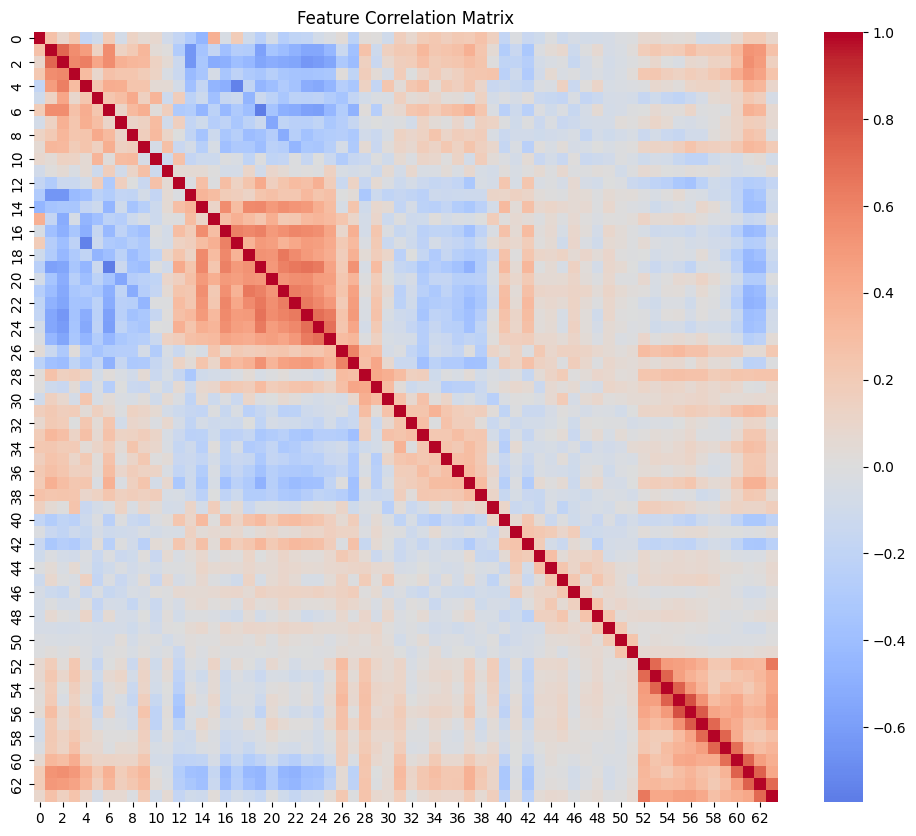

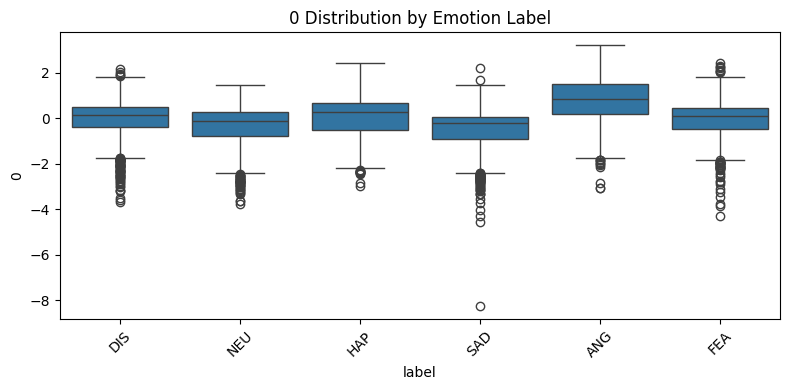

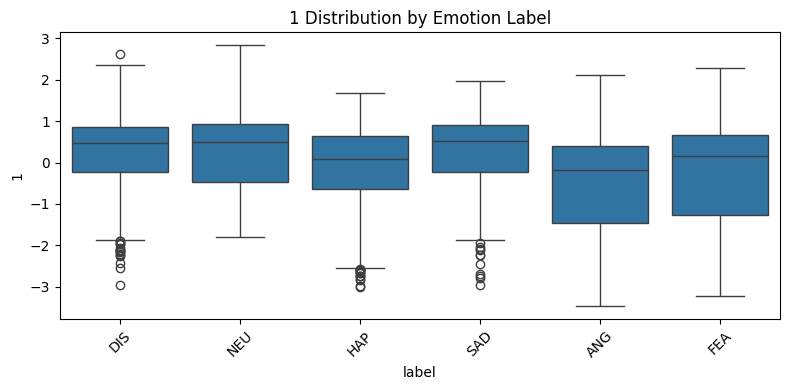

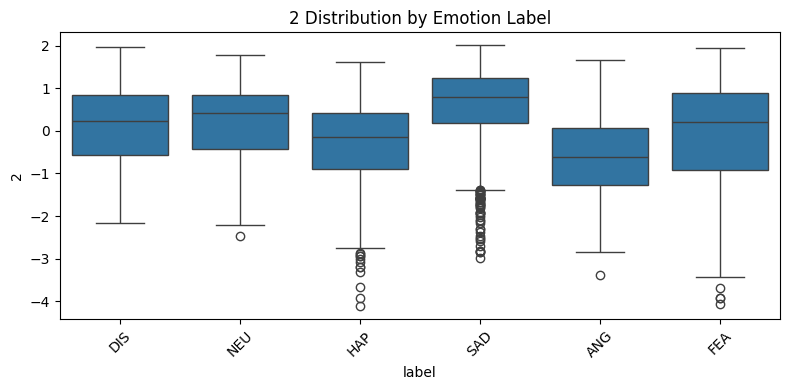

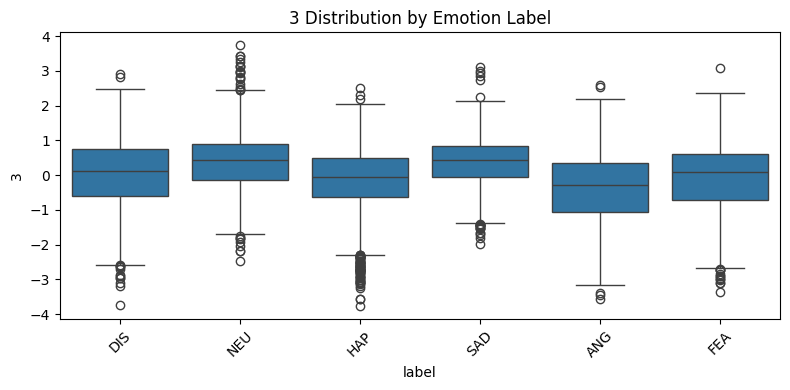

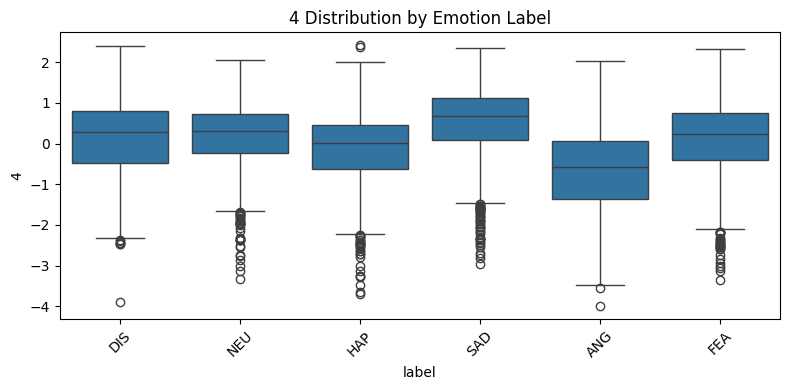

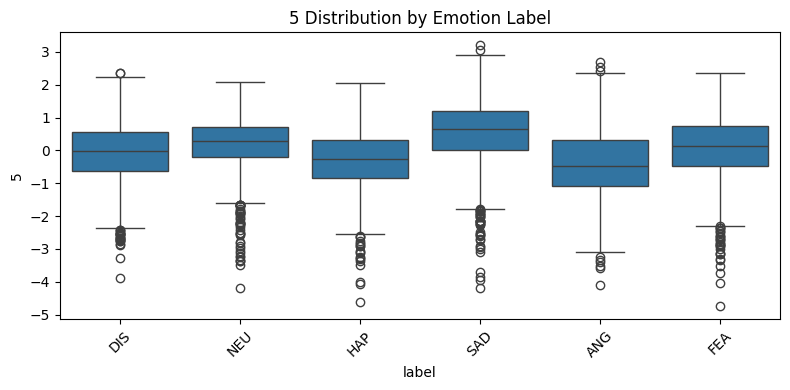

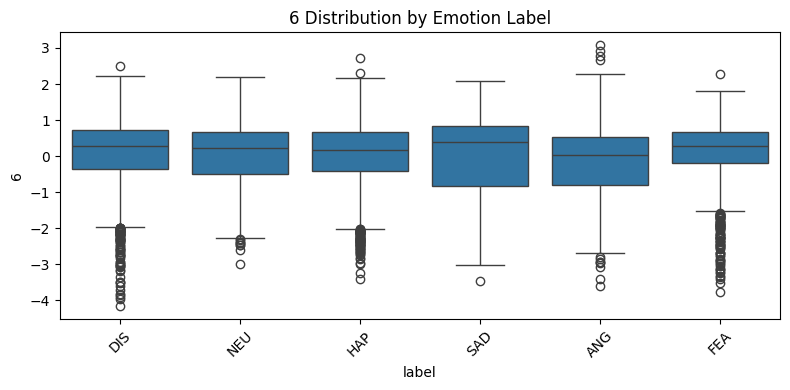

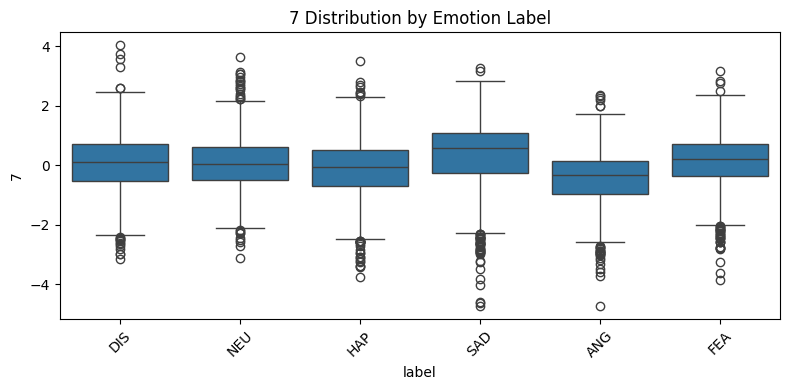

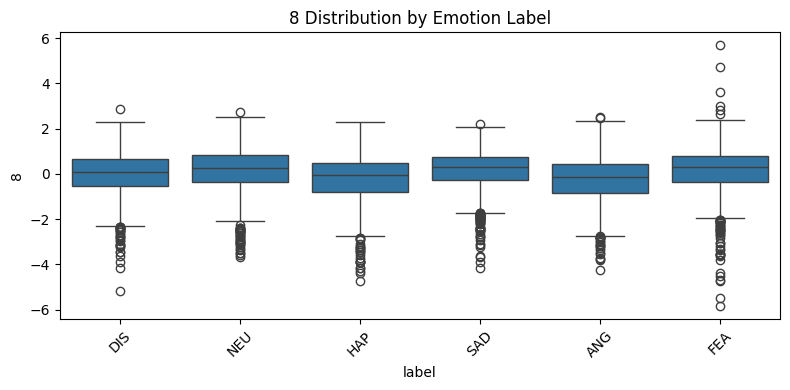

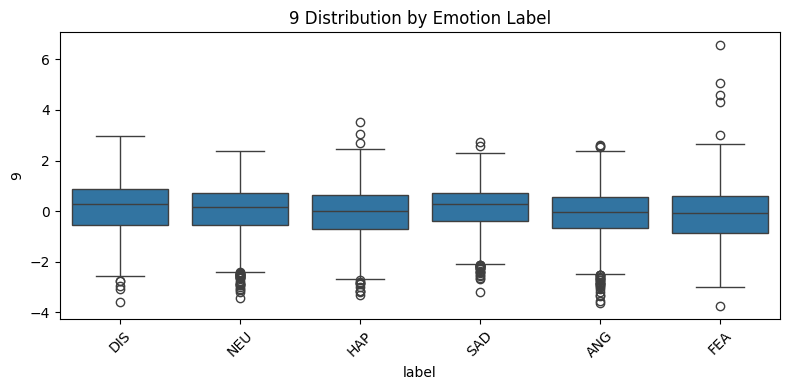

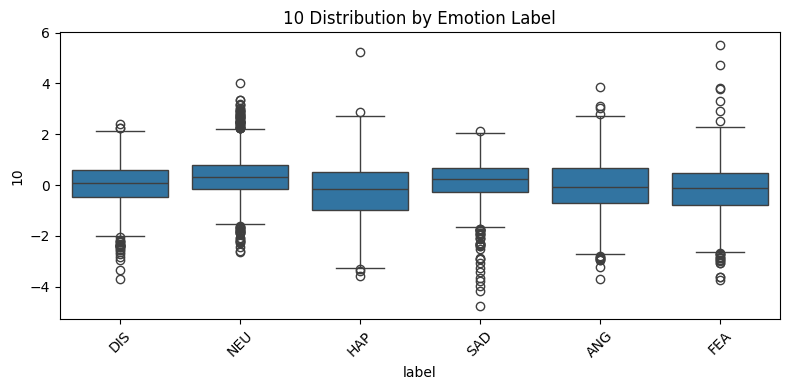

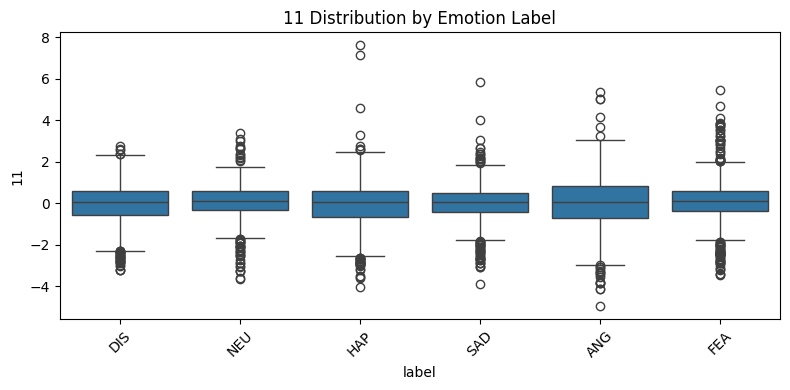

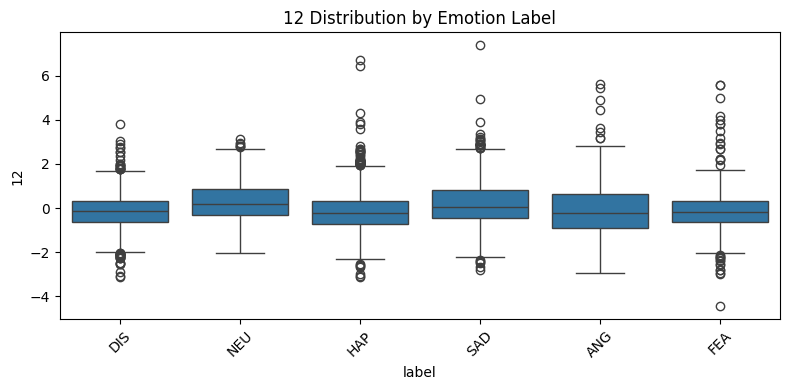

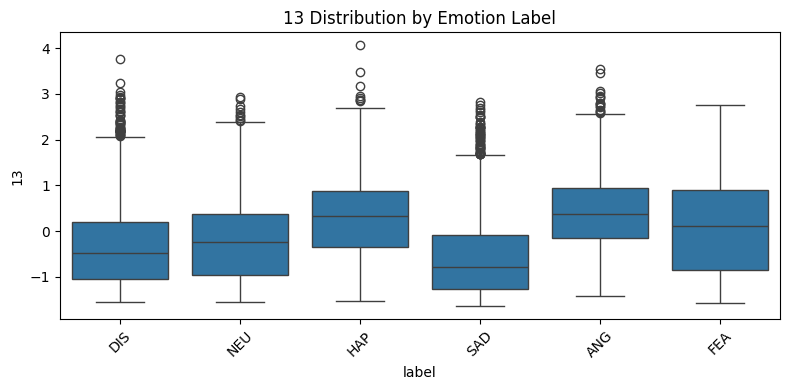

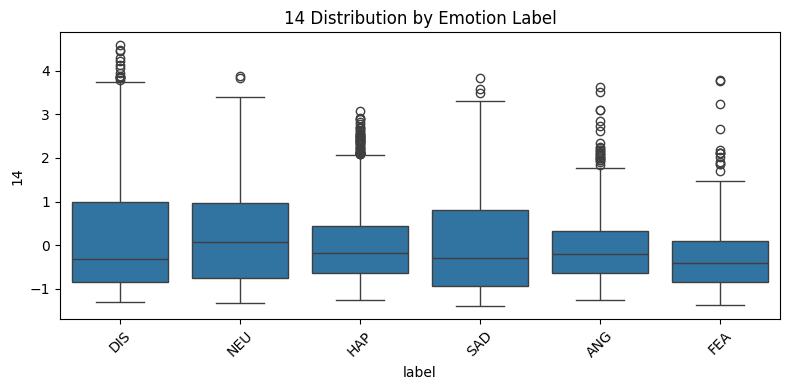

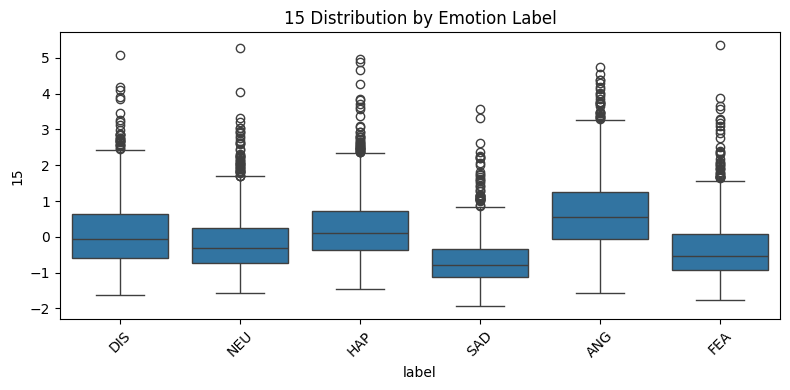

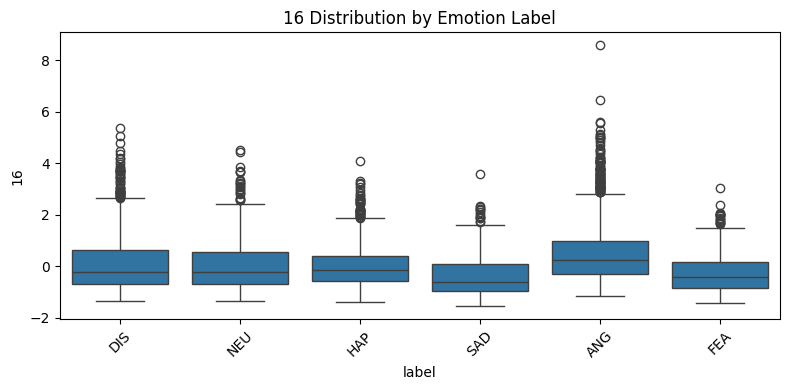

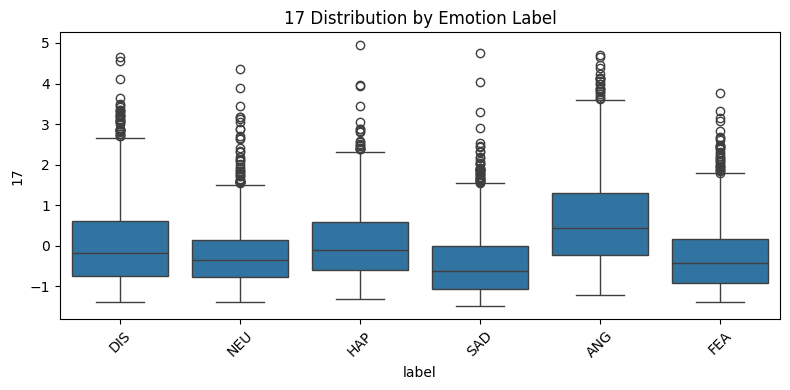

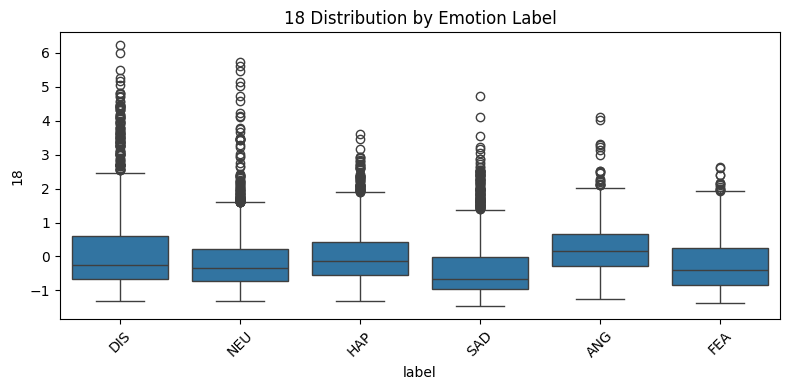

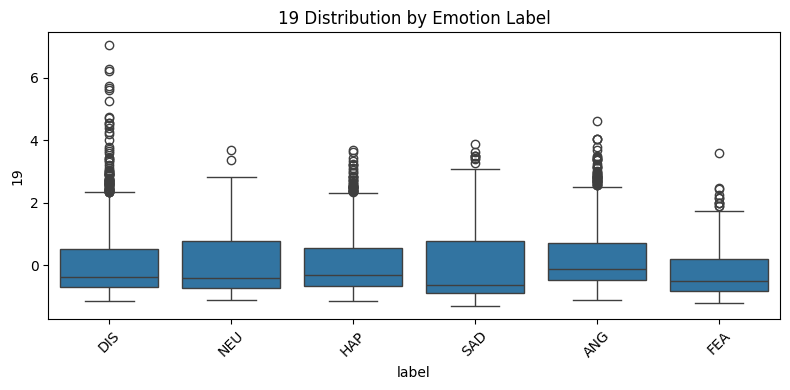

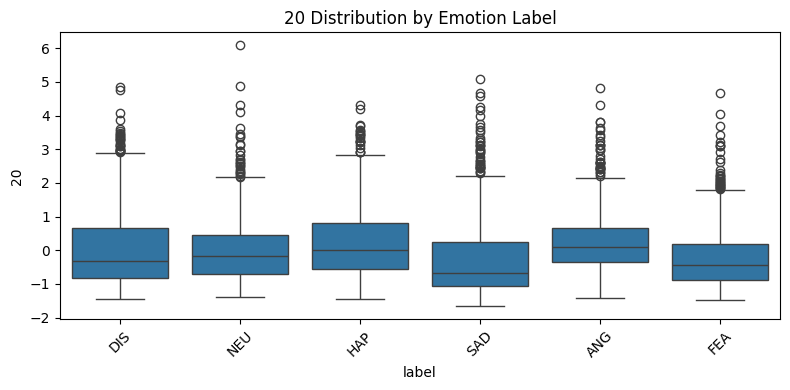

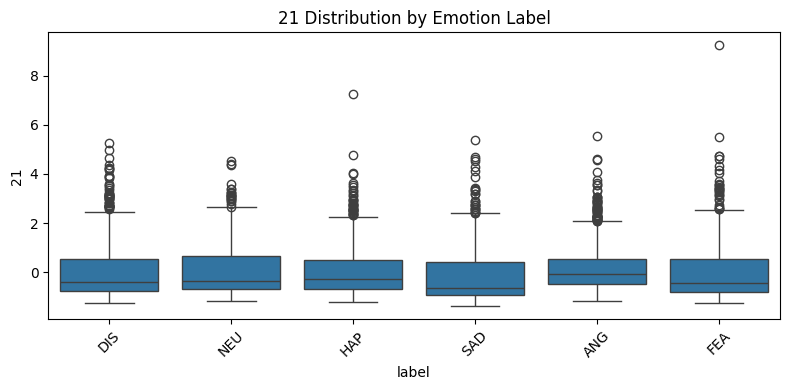

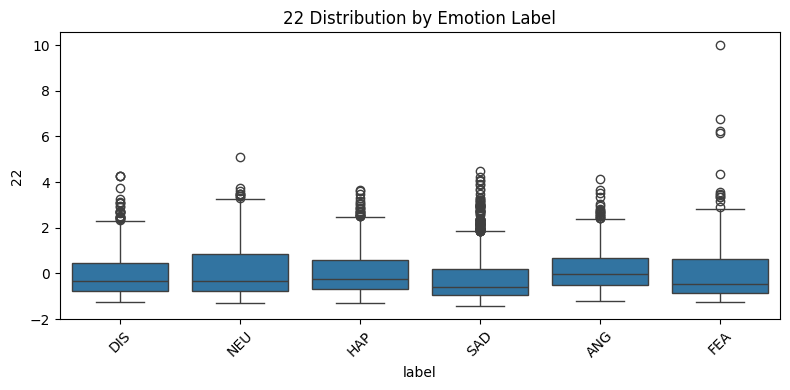

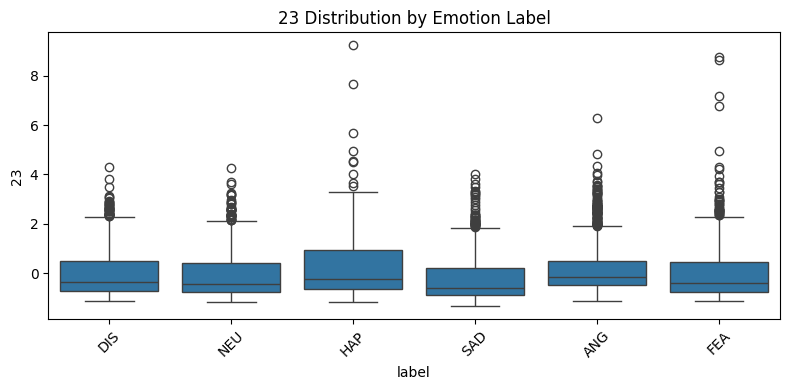

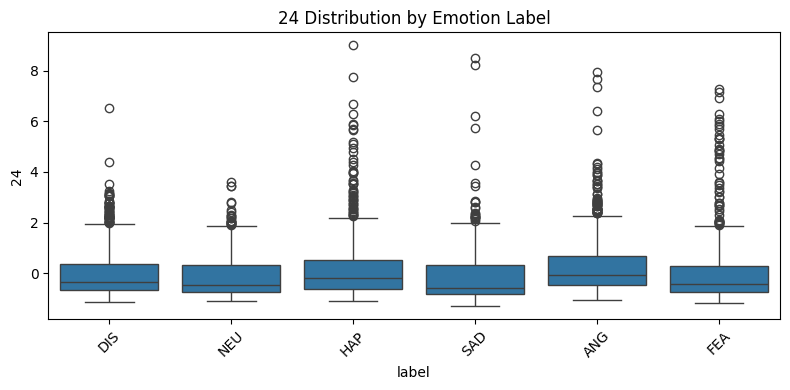

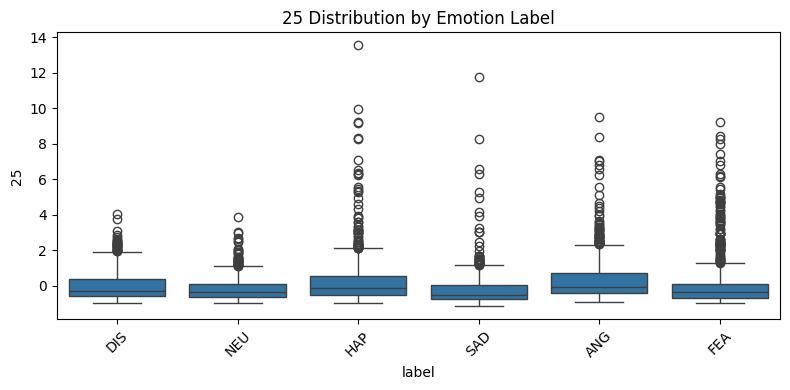

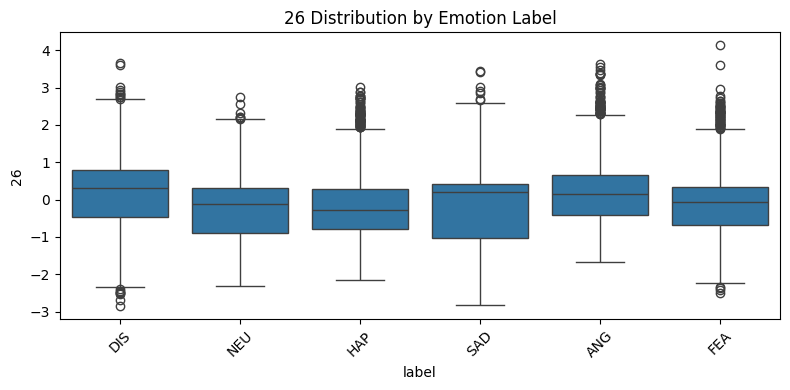

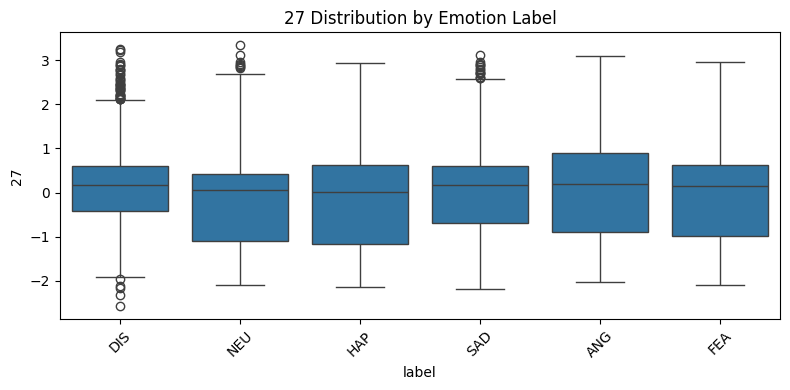

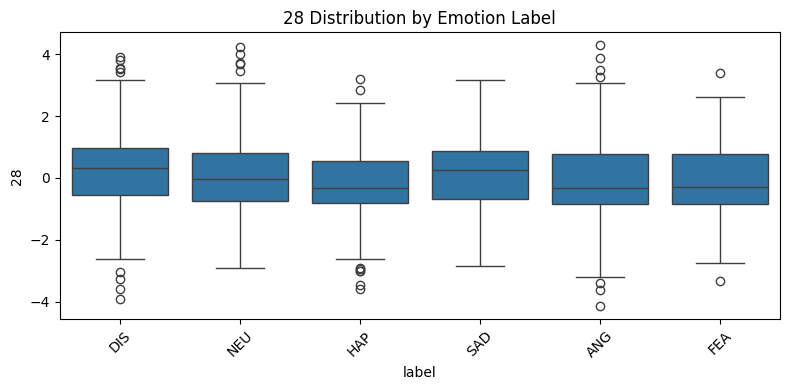

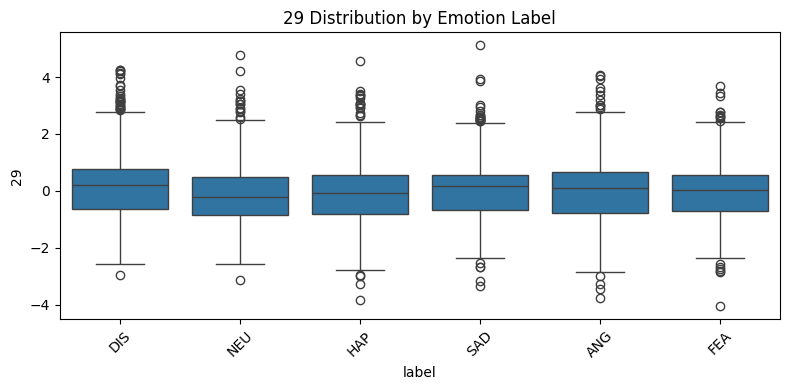

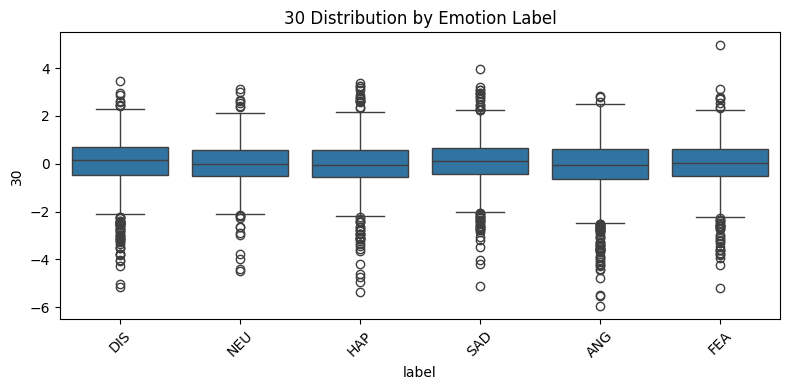

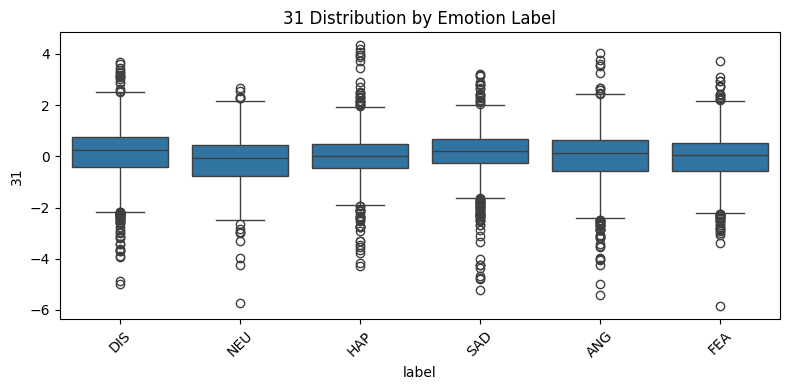

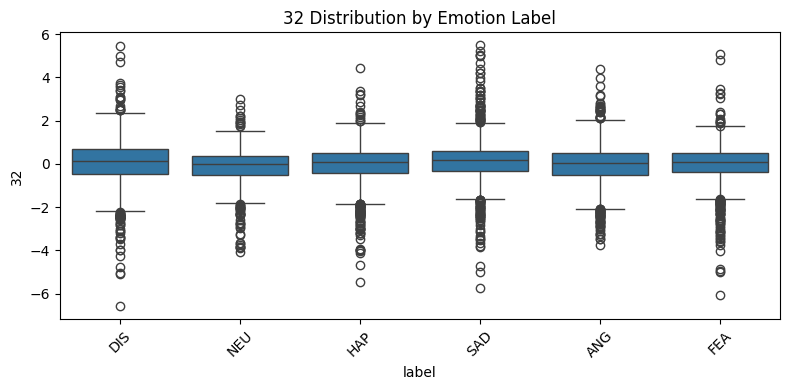

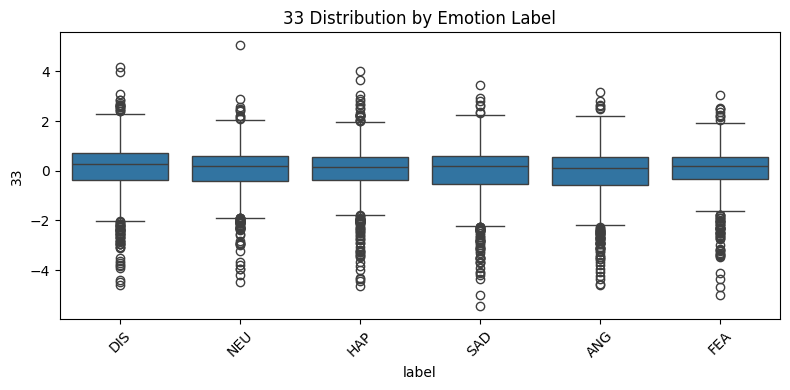

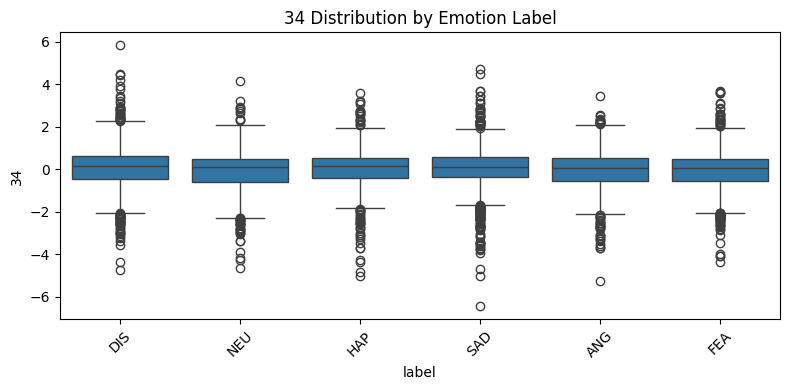

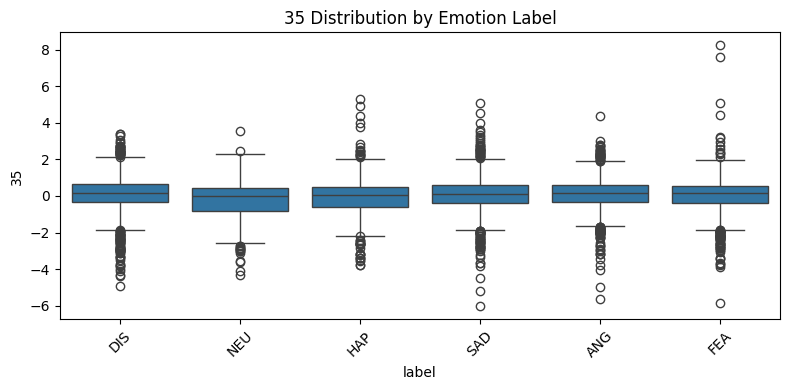

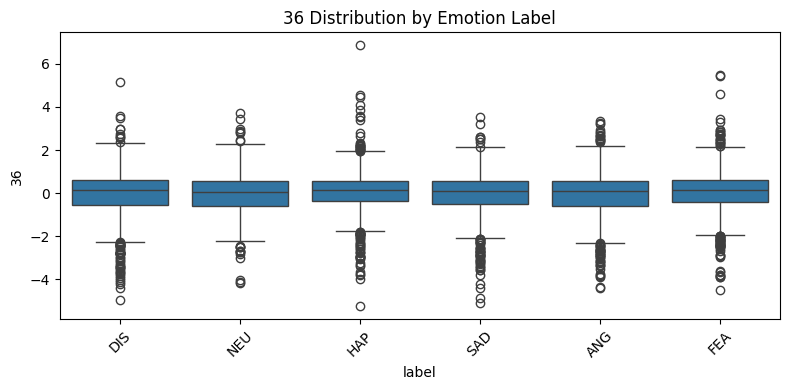

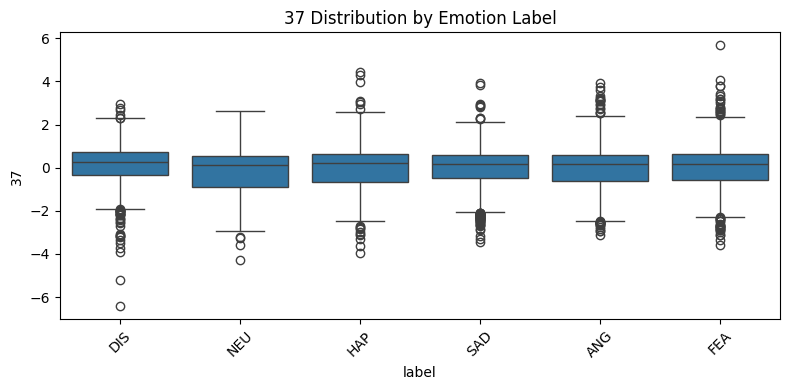

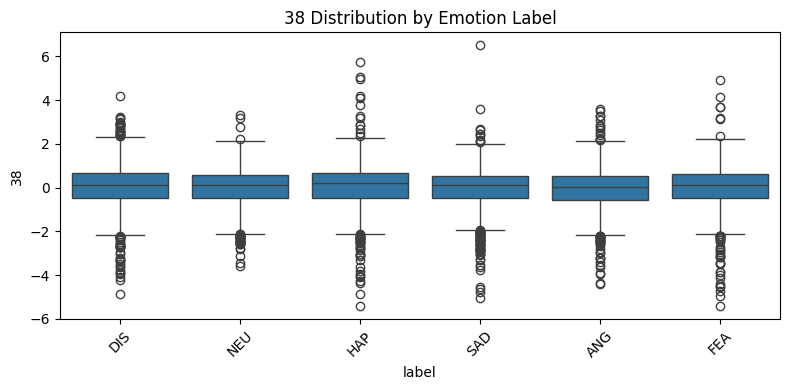

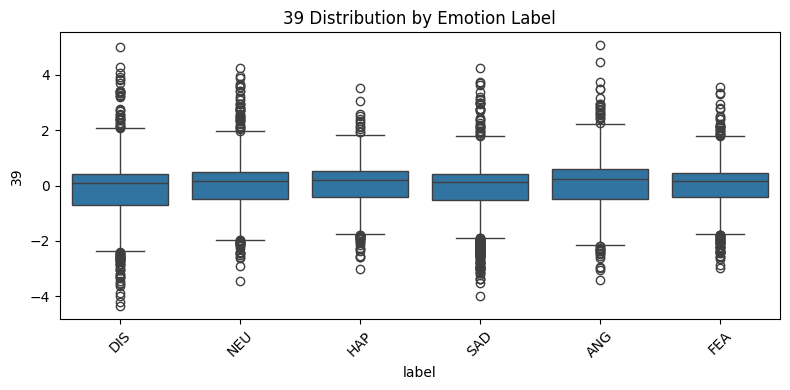

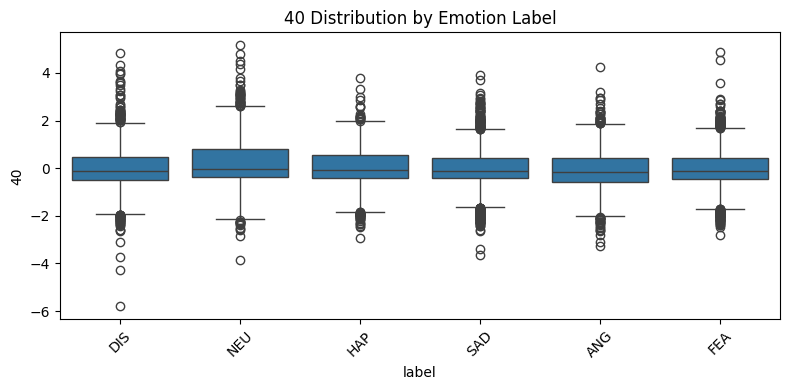

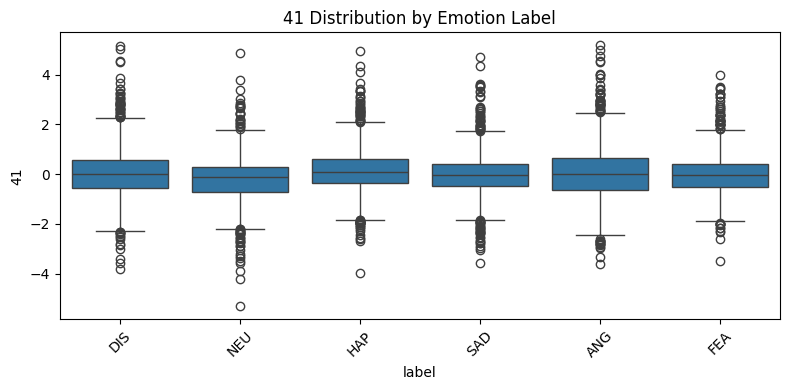

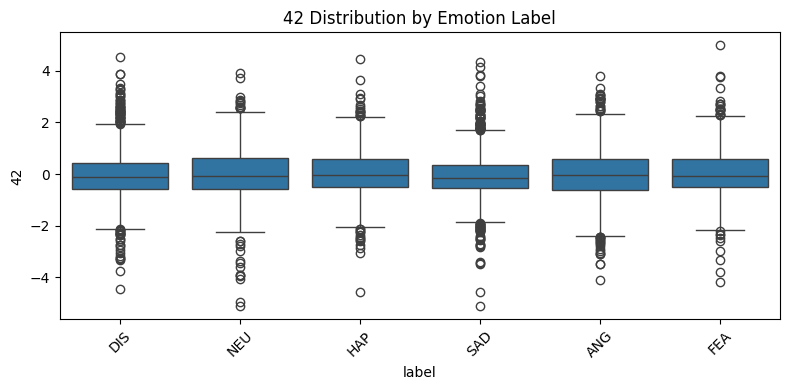

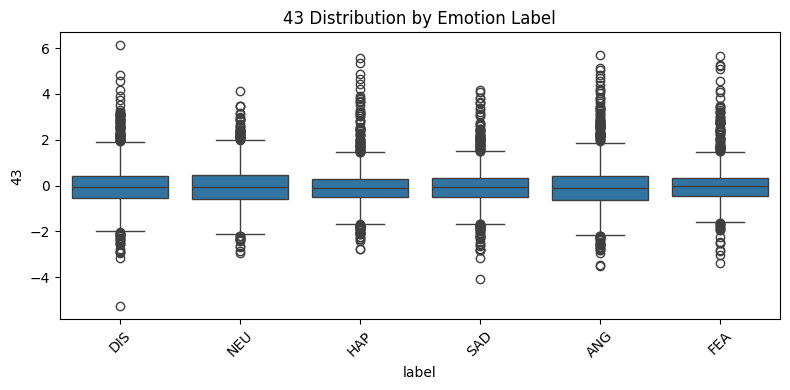

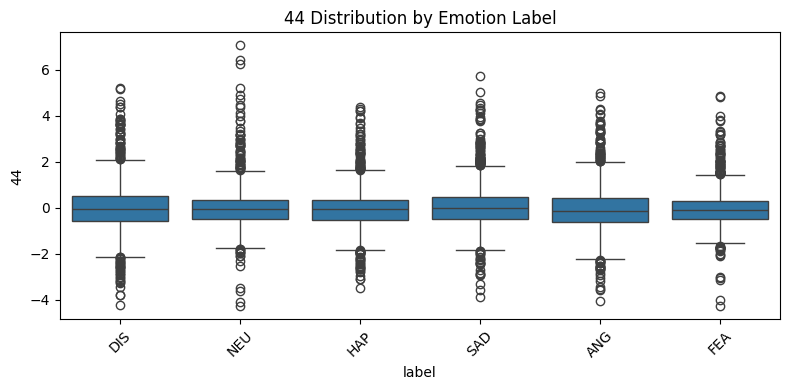

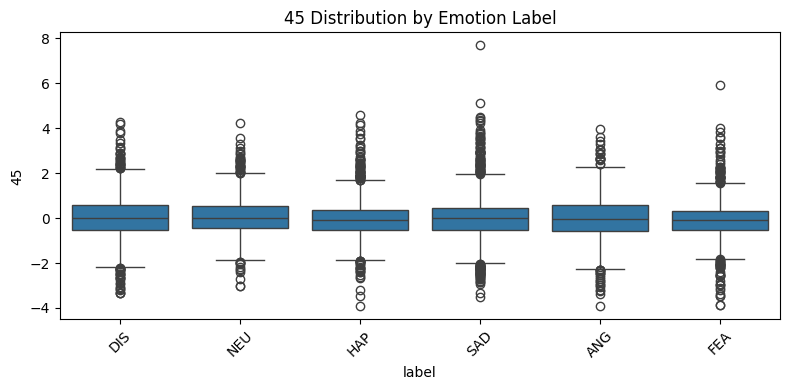

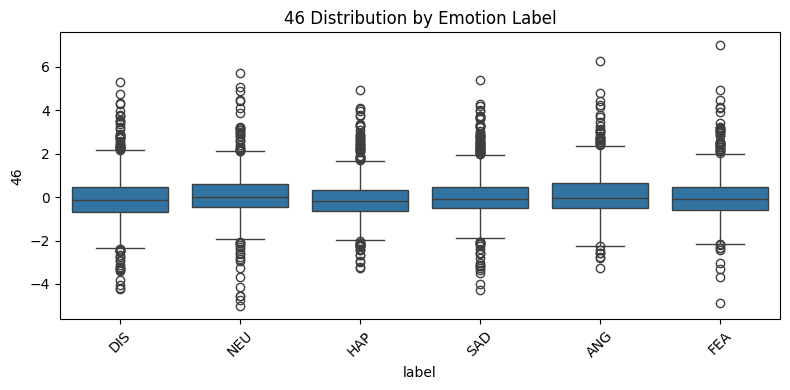

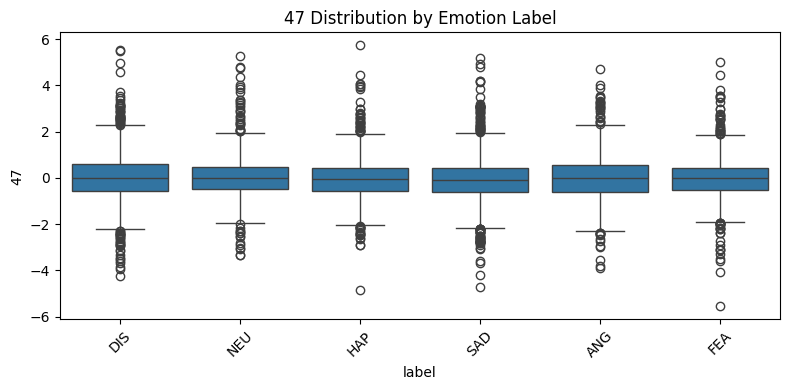

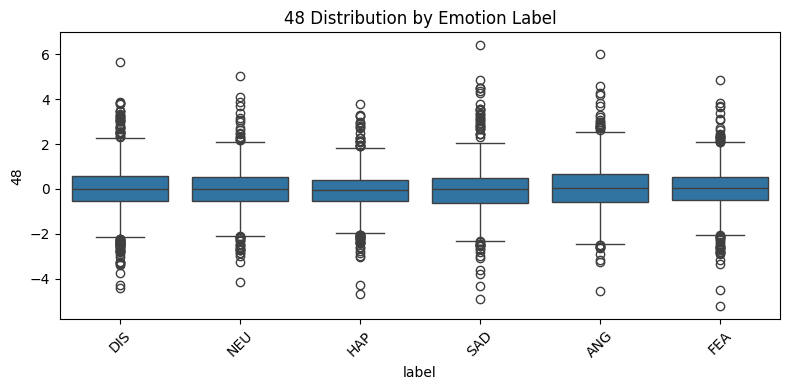

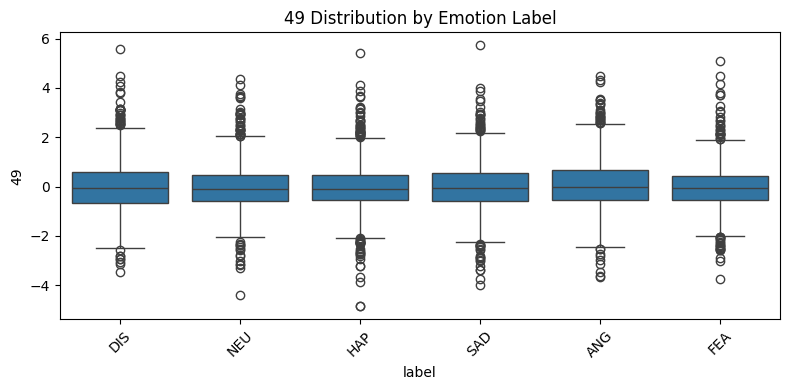

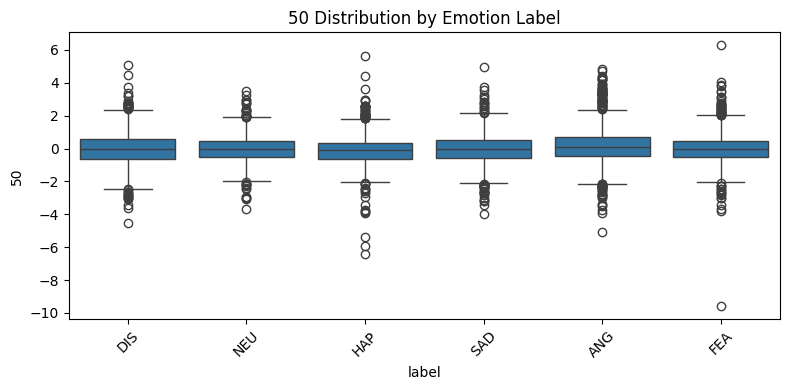

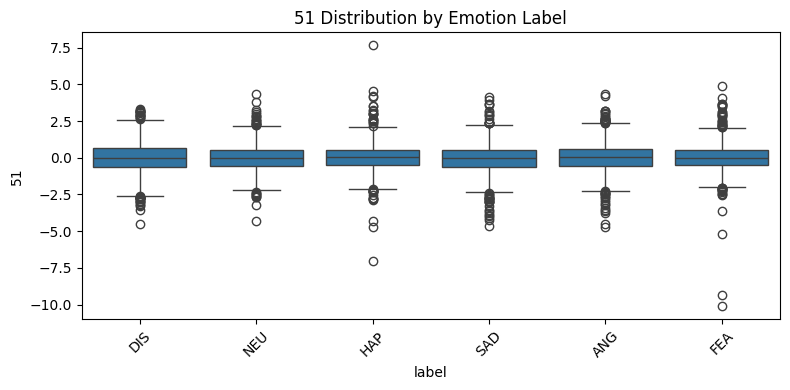

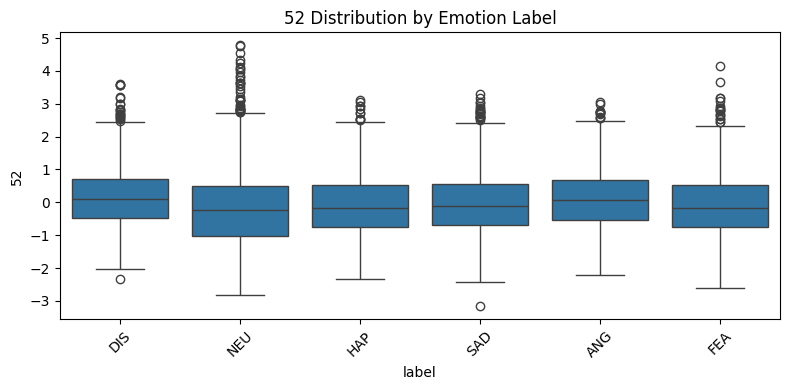

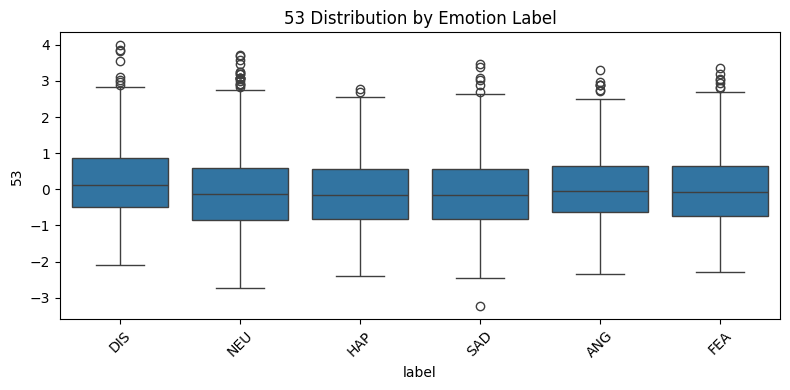

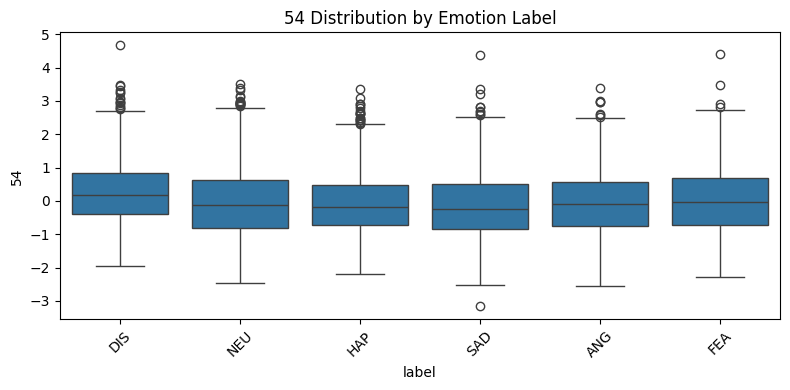

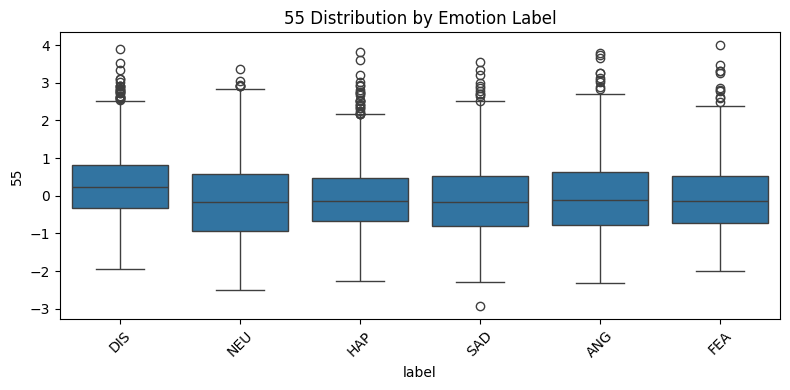

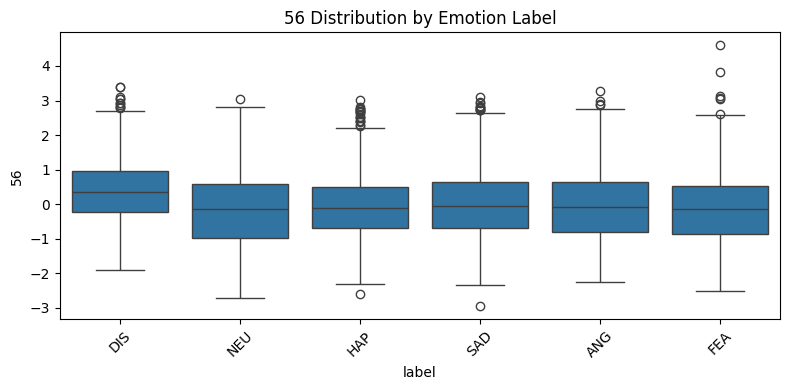

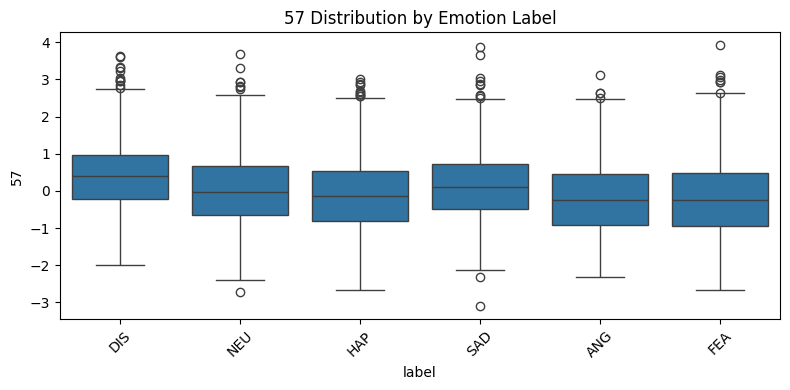

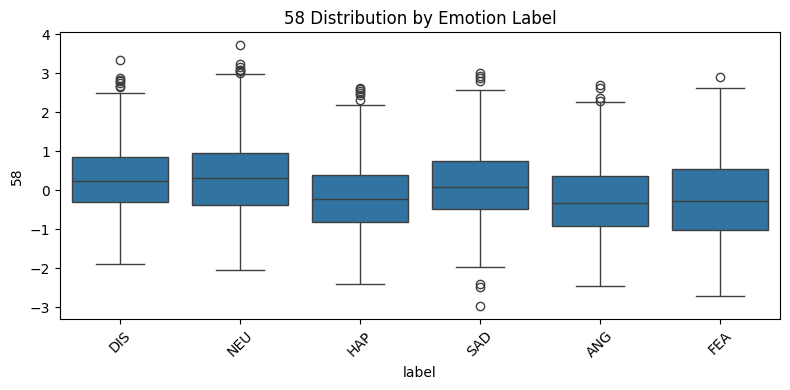

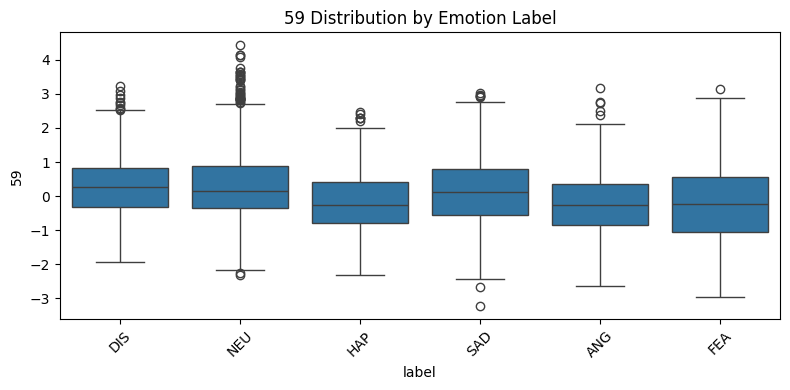

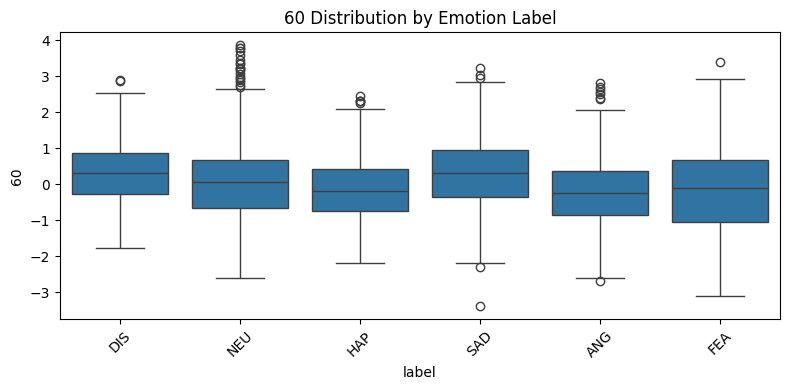

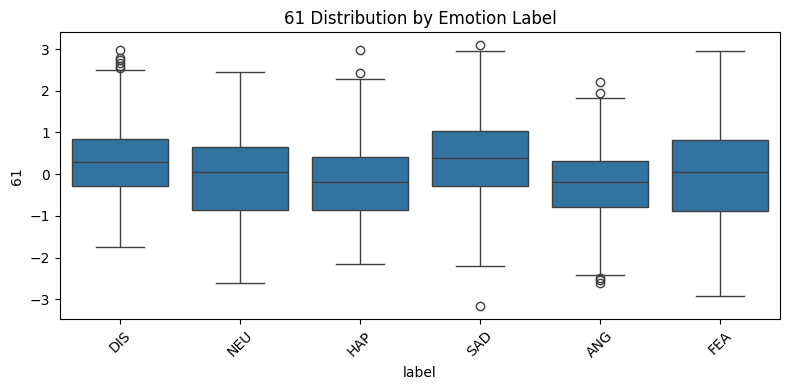

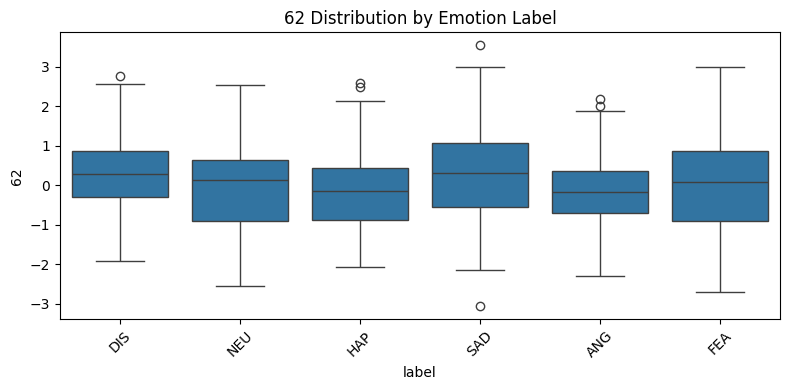

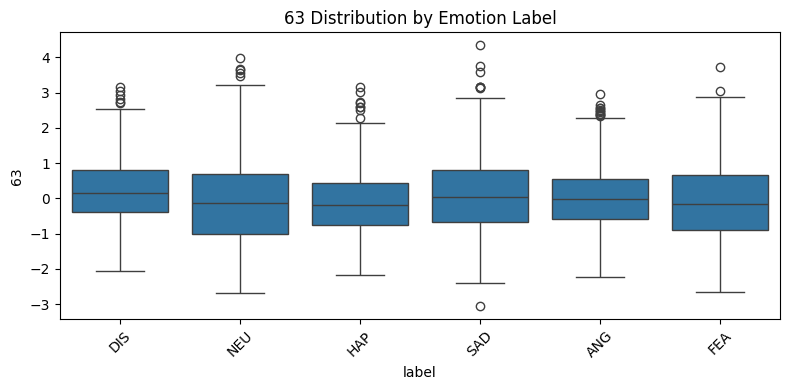

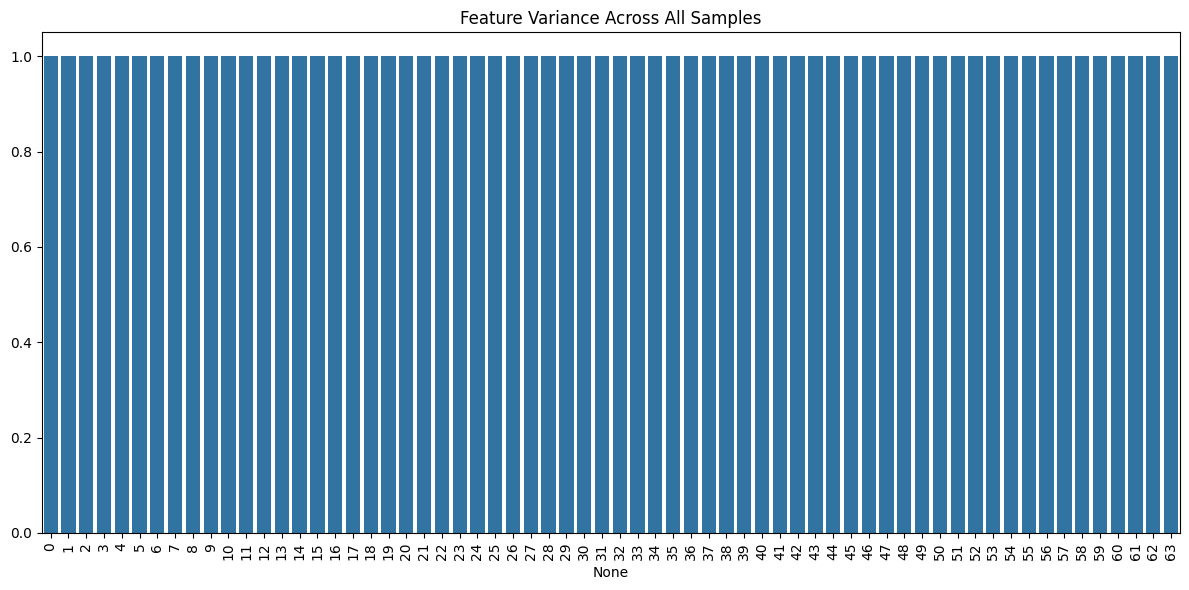

In [ ]:
plot_feature_correlations(train_features_df)
plot_feature_variance_by_label(train_features_df)
plot_feature_importance(train_features_df)

# Applying PCA and choosing the number of components to trap maximum variance

In [ ]:
from sklearn.decomposition import PCA

# ------------------------------
# Helper Functions for PCA
# ------------------------------
def compute_optimal_pca_components(X, variance_threshold=0.95):
    pca_temp = PCA().fit(X)
    cumulative_variance = np.cumsum(pca_temp.explained_variance_ratio_)
    n_components = np.argmax(cumulative_variance >= variance_threshold) + 1
    return n_components, cumulative_variance

In [ ]:
# ------------------------------
# PCA Transformation Function
# ------------------------------
def perform_pca(df_train, df_test, variance_threshold=0.95, n_components=None):
    # Separate labels from features
    train_labels = df_train['label'].values
    test_labels = df_test['label'].values
    X_train = df_train.drop(columns=['label'])
    X_test = df_test.drop(columns=['label'])

    # Compute optimal n_components if not provided
    if n_components is None:
        n_components, cumulative_variance = compute_optimal_pca_components(X_train, variance_threshold)
        print(f"Optimal number of PCA components for {variance_threshold*100:.0f}% variance: {n_components}")

        # Plot cumulative explained variance ratio
        plt.figure(figsize=(10, 6))
        plt.plot(np.arange(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
        plt.xlabel('Number of Components')
        plt.ylabel('Cumulative Explained Variance')
        plt.title('Explained Variance by PCA Components')
        plt.axhline(y=variance_threshold, color='r', linestyle='-')
        plt.axvline(x=n_components, color='r', linestyle='-')
        plt.tight_layout()
        plt.show()

    # Apply PCA
    pca_model = PCA(n_components=n_components)
    X_train_pca = pca_model.fit_transform(X_train)
    X_test_pca = pca_model.transform(X_test)

    # Create DataFrames for the PCA-transformed features
    component_names = [f'PC{i+1}' for i in range(n_components)]
    train_pca_df = pd.DataFrame(X_train_pca, columns=component_names)
    train_pca_df['label'] = train_labels

    test_pca_df = pd.DataFrame(X_test_pca, columns=component_names)
    test_pca_df['label'] = test_labels

    return train_pca_df, test_pca_df, pca_model

Optimal number of PCA components for 95% variance: 46


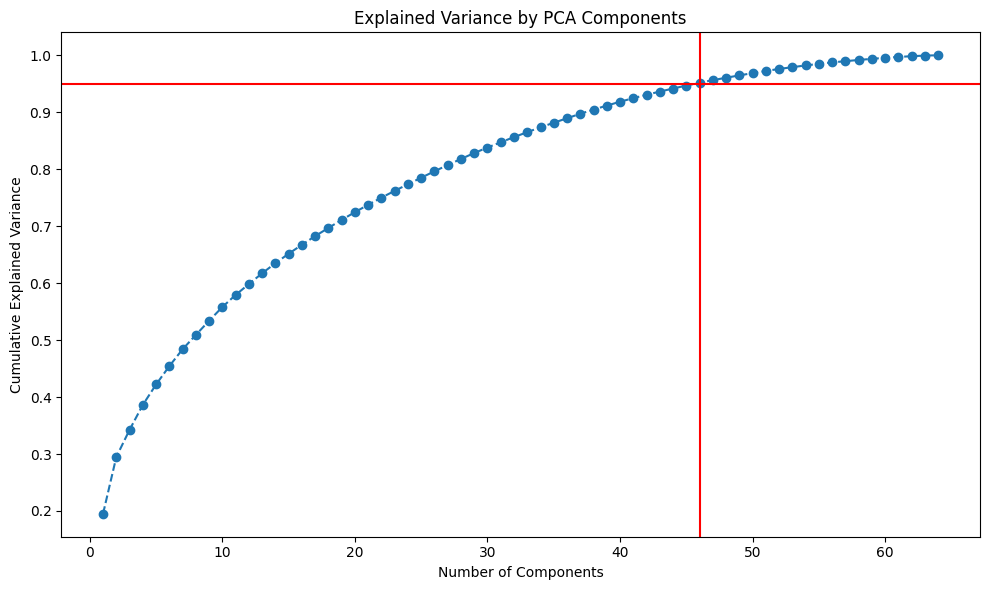

In [ ]:
train_pca_df, test_pca_df, pca_model = perform_pca(train_features_df,
                                                   test_features_df,
                                                   variance_threshold=0.95)

In [ ]:

# ------------------------------
# EDA Functions for PCA Features
# ------------------------------
def plot_pca_feature_distribution_by_label(pca_df, component=1):

    plt.figure(figsize=(10, 6))
    sns.boxplot(x='label', y=f'PC{component}', data=pca_df)
    plt.title(f'Distribution of Principal Component {component} by Emotion Label')
    plt.xlabel('Emotion Label')
    plt.ylabel(f'PC{component} Value')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


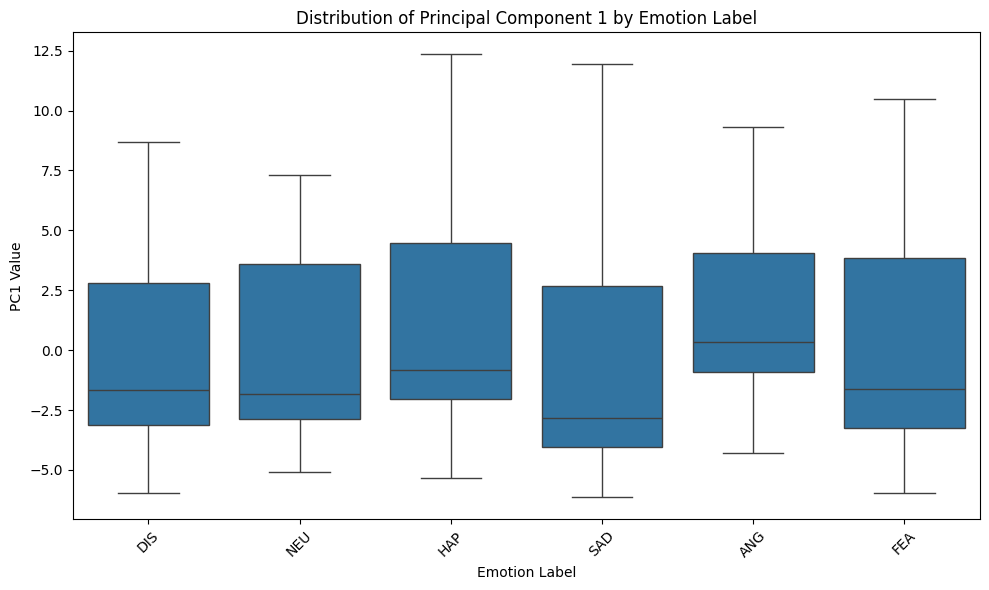

In [ ]:

# Visualize the distribution of the first principal component by emotion label for training data
plot_pca_feature_distribution_by_label(train_pca_df, component=1)

# **Visualising the plot of all the PCAs**

In [ ]:
def plot_all_pca_components_by_label(pca_df):
    n_components = len([col for col in pca_df.columns if col.startswith('PC')])
    ncols = 2
    nrows = int(np.ceil(n_components / ncols))
    plt.figure(figsize=(14, nrows*4))

    for i in range(1, n_components+1):
        plt.subplot(nrows, ncols, i)
        sns.boxplot(x='label', y=f'PC{i}', data=pca_df)
        plt.title(f'PC{i} Distribution by Label')
        plt.xlabel('Emotion Label')
        plt.ylabel(f'PC{i}')
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

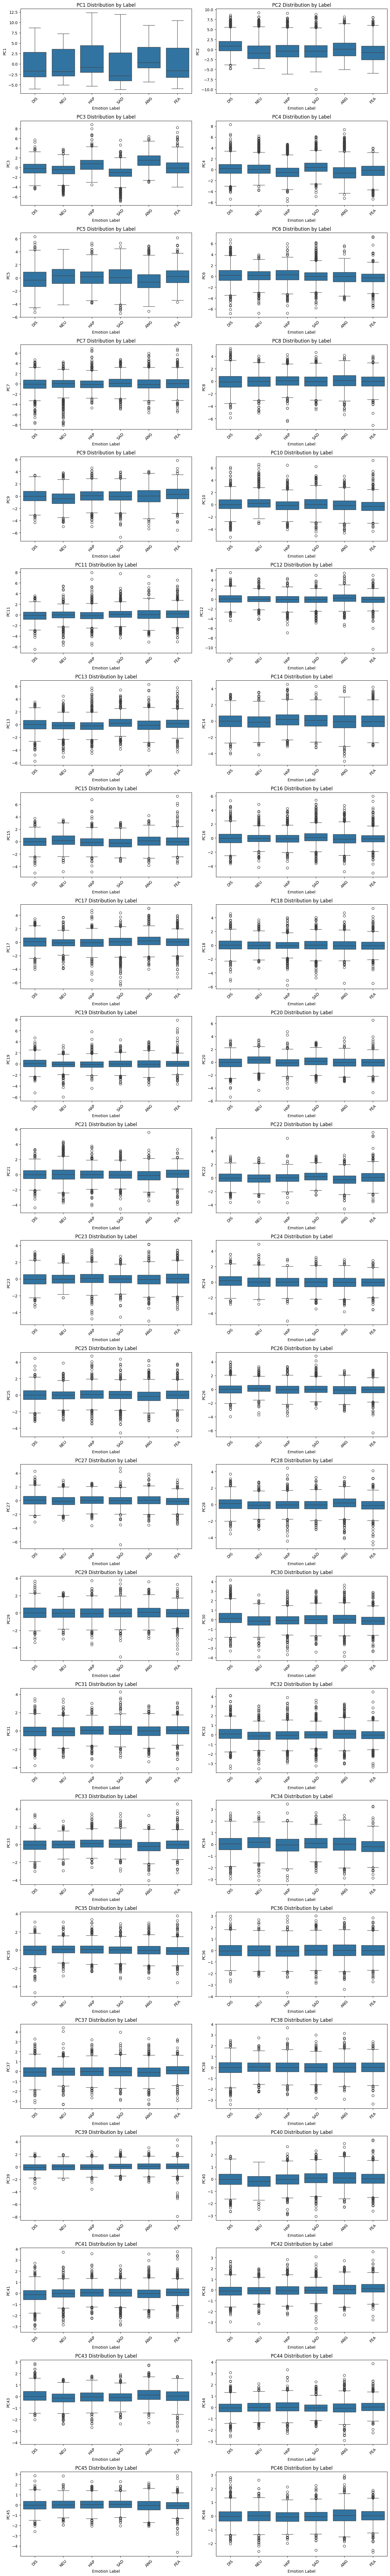

In [ ]:

# Optionally, visualize all principal components by label
plot_all_pca_components_by_label(train_pca_df)

In [ ]:
print(train_pca_df.columns)

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19',
       'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28',
       'PC29', 'PC30', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37',
       'PC38', 'PC39', 'PC40', 'PC41', 'PC42', 'PC43', 'PC44', 'PC45', 'PC46',
       'label'],
      dtype='object')


# **Reducing the number of PCA components for better results**

In [ ]:
# prompt: apply pca with n_components=10 on train_pca_df and test_pca_df

import pandas as pd
from sklearn.decomposition import PCA

# Assuming train_pca_df and test_pca_df are already defined as in your code

# Apply PCA with n_components=10
pca = PCA(n_components=6)

# Fit PCA on the training data
train_pca_df_reduced = pca.fit_transform(train_pca_df.drop('label', axis=1))

# Transform the test data using the same PCA model
test_pca_df_reduced = pca.transform(test_pca_df.drop('label', axis=1))

# Convert the results back to dataframes (optional)
train_pca_df = pd.DataFrame(data=train_pca_df_reduced, columns=[f'PC{i}' for i in range(1, 7)])
train_pca_df['label'] = train_features_df['label']

test_pca_df = pd.DataFrame(data=test_pca_df_reduced, columns=[f'PC{i}' for i in range(1, 7)])
test_pca_df['label'] = test_features_df['label']


Function for splitting the data

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors

def split_train_validation(df, val_size=0.2, random_state=42):

    train_df, val_df = train_test_split(df, test_size=val_size, stratify=df['label'], random_state=random_state)
    return train_df, val_df


Function for KMeans Clustering

In [ ]:

def kmeans_clustering(X, n_clusters, random_state=42):
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    labels = kmeans.fit_predict(X)
    return labels, kmeans



Function to assign labels to the clusters mae by the algorithm

In [ ]:
def majority_voting_mapping(cluster_labels, true_labels):
    mapping = {}
    unique_clusters = np.unique(cluster_labels)
    for cluster in unique_clusters:
        # Get the true labels for samples in this cluster
        labels_in_cluster = true_labels[cluster_labels == cluster]
        if len(labels_in_cluster) == 0:
            continue
        # Majority vote
        majority_label = pd.Series(labels_in_cluster).value_counts().idxmax()
        mapping[cluster] = majority_label
    return mapping

Function to replace mapping with labels

In [ ]:
def apply_majority_mapping(cluster_labels, mapping):

    return np.array([mapping.get(cl, -1) for cl in cluster_labels])

Custom DBScan function

In [ ]:

# 3. Custom DBSCAN Implementation

def dbscan_custom(X, eps, min_samples):
    n_samples = X.shape[0]
    cluster_labels = -1 * np.ones(n_samples, dtype=int)
    visited = np.zeros(n_samples, dtype=bool)
    cluster_id = 0

    # Precompute neighbors for every point for efficiency
    nbrs = NearestNeighbors(radius=eps)
    nbrs.fit(X)
    neighbors_list = nbrs.radius_neighbors(X, radius=eps, return_distance=False)

    def expand_cluster(idx, neighbors, cluster_id):
        cluster_labels[idx] = cluster_id
        i = 0
        while i < len(neighbors):
            point = neighbors[i]
            if not visited[point]:
                visited[point] = True
                point_neighbors = neighbors_list[point]
                if len(point_neighbors) >= min_samples:
                    neighbors = np.concatenate((neighbors, point_neighbors))
            if cluster_labels[point] == -1:
                cluster_labels[point] = cluster_id
            i += 1

    for idx in range(n_samples):
        if visited[idx]:
            continue
        visited[idx] = True
        neighbors = neighbors_list[idx]
        if len(neighbors) < min_samples:
            cluster_labels[idx] = -1  # Noise
        else:
            expand_cluster(idx, neighbors, cluster_id)
            cluster_id += 1

    return cluster_labels

Hyper Parameter Tuning for eps and min_samples

In [ ]:
def grid_search_dbscan(X, true_labels, eps_values, min_samples_values):

    best_ari = -1
    best_params = None
    best_labels = None

    for eps in eps_values:
        for min_samples in min_samples_values:
            labels = dbscan_custom(X, eps, min_samples)
            # Only consider solutions with at least 2 clusters (exclude noise-only)
            if len(set(labels)) > 1 and np.any(labels != -1):
                ari = adjusted_rand_score(true_labels, labels)
                # Print progress (optional)
                print(f"DBSCAN eps: {eps}, min_samples: {min_samples}, ARI: {ari:.4f}")
                if ari > best_ari:
                    best_ari = ari
                    best_params = (eps, min_samples)
                    best_labels = labels
    return best_params, best_ari, best_labels

Visulasize based on two PC s the scaterred labels

In [ ]:
def plot_dbscan_clusters(X, cluster_labels, title="DBSCAN Clusters"):
    plt.figure(figsize=(10, 6))
    unique_labels = np.unique(cluster_labels)
    for label in unique_labels:
        idx = cluster_labels == label
        plt.scatter(X[idx, 0], X[idx, 1], label=f'Cluster {label}' if label != -1 else "Noise")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

Evaluate and generate final prediction file for logging the results

In [ ]:
def evaluate_clustering(true_labels, predicted_labels):
    return adjusted_rand_score(true_labels, predicted_labels)

def generate_test_predictions(kmeans_model, majority_mapping, df_test, file_paths):
    X_test = df_test.drop(columns=['label'])
    cluster_labels = kmeans_model.predict(X_test)
    predicted_labels = apply_majority_mapping(cluster_labels, majority_mapping)

    # Build dictionary mapping file path -> predicted label (convert label to string if needed)
    predictions = {file: str(label) for file, label in zip(file_paths, predicted_labels)}
    return predictions

KMeans Clustering ARI on validation set: 0.0529
DBSCAN eps: 0.5, min_samples: 3, ARI: 0.0006
DBSCAN eps: 0.5, min_samples: 4, ARI: 0.0002
DBSCAN eps: 0.5, min_samples: 5, ARI: 0.0001
DBSCAN eps: 0.5, min_samples: 6, ARI: 0.0000
DBSCAN eps: 0.6666666666666666, min_samples: 3, ARI: 0.0036
DBSCAN eps: 0.6666666666666666, min_samples: 4, ARI: 0.0028
DBSCAN eps: 0.6666666666666666, min_samples: 5, ARI: 0.0021
DBSCAN eps: 0.6666666666666666, min_samples: 6, ARI: 0.0016
DBSCAN eps: 0.6666666666666666, min_samples: 7, ARI: 0.0012
DBSCAN eps: 0.6666666666666666, min_samples: 8, ARI: 0.0008
DBSCAN eps: 0.6666666666666666, min_samples: 9, ARI: 0.0005
DBSCAN eps: 0.8333333333333333, min_samples: 3, ARI: 0.0101
DBSCAN eps: 0.8333333333333333, min_samples: 4, ARI: 0.0110
DBSCAN eps: 0.8333333333333333, min_samples: 5, ARI: 0.0098
DBSCAN eps: 0.8333333333333333, min_samples: 6, ARI: 0.0086
DBSCAN eps: 0.8333333333333333, min_samples: 7, ARI: 0.0084
DBSCAN eps: 0.8333333333333333, min_samples: 8, ARI:

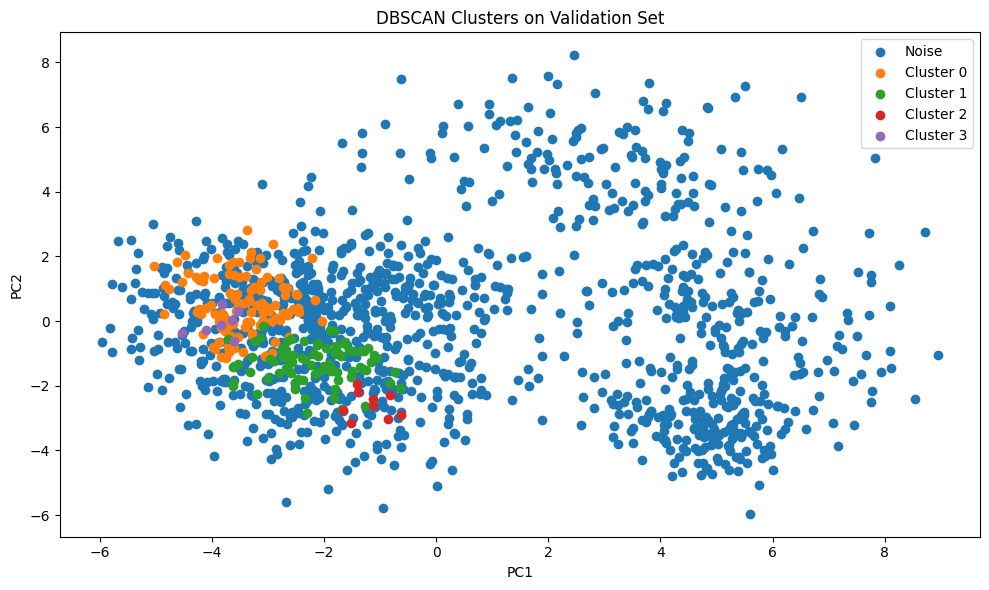

Test Set - KMeans Clustering ARI: 0.0489, Accuracy: 0.2557
Sample Test Predictions:
File: 0, Predicted Label: SAD
File: 1, Predicted Label: SAD
File: 2, Predicted Label: ANG
File: 3, Predicted Label: SAD
File: 4, Predicted Label: ANG


In [ ]:
if __name__ == "__main__":
    train_subset, valid_subset = split_train_validation(train_pca_df, val_size=0.2, random_state=42)

    # Extract features (X) and true labels (y) from training and validation subsets
    X_train = train_subset.drop(columns=['label'])
    y_train = train_subset['label'].values
    X_valid = valid_subset.drop(columns=['label'])
    y_valid = valid_subset['label'].values

    # Determine the number of unique emotion classes (used for KMeans)
    n_emotions = len(np.unique(y_train))

    # ------------------------------
    # K-Means Clustering
    # ------------------------------
    # Perform KMeans on training subset
    kmeans_labels_train, kmeans_model = kmeans_clustering(X_train, n_clusters=n_emotions, random_state=42)
    # Create majority voting mapping using training subset
    mapping = majority_voting_mapping(kmeans_labels_train, y_train)

    # Predict clusters on validation subset and assign labels using the mapping
    valid_cluster_labels = kmeans_model.predict(X_valid)
    valid_predicted_labels = apply_majority_mapping(valid_cluster_labels, mapping)

    # Evaluate KMeans clustering using ARI
    ari_kmeans = evaluate_clustering(y_valid, valid_predicted_labels)
    print(f"KMeans Clustering ARI on validation set: {ari_kmeans:.4f}")

    # ------------------------------
    # DBSCAN Clustering with Hyperparameter Tuning
    # ------------------------------
    # Convert training subset features to numpy array for DBSCAN
    X_train_np = X_train.values
    # Define grid search ranges for eps and min_samples
    eps_values = np.linspace(0.5,2, 10)   # Adjust as needed
    min_samples_values = range(3, 10)          # Adjust as needed

    # Grid search DBSCAN on training subset; evaluate on validation labels
    best_params, best_ari, best_dbscan_labels_train = grid_search_dbscan(X_train_np, y_train, eps_values, min_samples_values)
    if best_params is not None:
        best_eps, best_min_samples = best_params
        print(f"Best DBSCAN parameters: eps = {best_eps}, min_samples = {best_min_samples}, ARI = {best_ari:.4f}")
    else:
        print("No suitable DBSCAN parameters found!")

    # Apply DBSCAN on validation subset using best parameters if available
    if best_params is not None:
        X_valid_np = X_valid.values
        dbscan_labels_valid = dbscan_custom(X_valid_np, best_eps, best_min_samples)
        ari_dbscan = evaluate_clustering(y_valid, dbscan_labels_valid)
        print(f"DBSCAN Clustering ARI on validation set: {ari_dbscan:.4f}")
        # Plot DBSCAN clusters using first two principal components
        plot_dbscan_clusters(X_valid_np, dbscan_labels_valid, title="DBSCAN Clusters on Validation Set")

    # ------------------------------
    # Test Set Predictions using KMeans Model
    # ------------------------------
    # For test predictions, we use the KMeans model (with majority mapping) as an example.
    # Assume test_pca_df has a 'label' column (true labels) and a separate Series `test_file_paths`
    # containing the file paths (if not, adjust accordingly).
    X_test = test_pca_df.drop(columns=['label'])
    y_test = test_pca_df['label'].values
    test_file_paths = test_pca_df.index  # or replace with the appropriate column if available

    # Predict clusters on test set using KMeans
    test_cluster_labels = kmeans_model.predict(X_test)
    test_predicted_labels = apply_majority_mapping(test_cluster_labels, mapping)

    # Evaluate test performance
    ari_test = evaluate_clustering(y_test, test_predicted_labels)
    acc_test = accuracy_score(y_test, test_predicted_labels)
    print(f"Test Set - KMeans Clustering ARI: {ari_test:.4f}, Accuracy: {acc_test:.4f}")

    # Generate predictions dictionary: file path -> predicted label (as string)
    predictions_dict = generate_test_predictions(kmeans_model, mapping, test_pca_df, test_file_paths)
    print("Sample Test Predictions:")
    for k, v in list(predictions_dict.items())[:5]:
        print(f"File: {k}, Predicted Label: {v}")

    # Optionally, save predictions to a CSV file
    pred_df = pd.DataFrame(list(predictions_dict.items()), columns=['file_path', 'predicted_label'])
    pred_df.to_csv('test_predictions.csv', index=False)